In [337]:
import pandas as pd
from dill import load
import matplotlib.pyplot as plt
import numpy as np
import json
import src.utils as utils
from src.utils.transformers import Transformer_PCA
from src.models.utils import DataLoaderSklearn, DataLoaderNDArray
import sys
from argparse import Namespace
import torch

sys.modules['utils'] = utils

# Raw data

In [256]:
db_pull_calibrated = pd.read_parquet("data/db_pull_calibrated.parquet")
db_pull_calibrated

timestamp  Accelerometer_x  Accelerometer_y   
0       2023-03-16 15:50:20.660         0.856745        -9.736820  \
1       2023-03-16 15:50:20.670         0.909825        -8.220062   
2       2023-03-16 15:50:20.680         0.336442        -7.226947   
3       2023-03-16 15:50:20.690        -0.488674        -6.452185   
4       2023-03-16 15:50:20.700        -1.977320        -5.265067   
...                         ...              ...              ...   
4314652 2023-03-12 13:25:03.670         8.873645       -12.125825   
4314653 2023-03-12 13:25:03.680         3.578034       -10.812859   
4314654 2023-03-12 13:25:03.690        -0.935012        -8.310925   
4314655 2023-03-12 13:25:03.700        -4.368380        -5.661316   
4314656 2023-03-12 13:25:03.710        -8.319786        -0.731302   

         Accelerometer_z  Gyroscope_x  Gyroscope_y  Gyroscope_z   
0               0.020757     0.268116    -1.078746     1.059684  \
1               1.002787     0.271234    -1.028209     1.029722   
2               2.845873     0.084436    -0.911180     0.878822   
3               5.054952    -0.314842    -0.878484     0.670179   
4               5.953660    -0.817032    -0.921044     0.375689   
...                  ...          ...          ...          ...   
4314652         7.280043    -1.097083    -2.545262    -3.277552   
4314653         7.249442    -0.878516    -3.433582    -2.865095   
4314654         6.780705    -0.698311    -3.857278    -2.475241   
4314655         7.183708    -0.454698    -3.775789    -2.106645   
4314656         8.710353    -0.046762    -3.484895    -1.825647   

         Magnetometer_x  Magnetometer_y  Magnetometer_z activity   
0            -17.852205       35.951828       -0.945442   Rennen  \
1            -17.822435       35.816177       -1.256371   Rennen   
2            -17.261415       35.596741       -1.602486   Rennen   
3            -17.013292       35.198273       -1.386124   Rennen   
4            -16.602587       35.248901       -1.095116   Rennen   
...                 ...             ...             ...      ...   
4314652      -32.639999       26.099998       23.580000   Rennen   
4314653      -33.480000       24.660000       24.240000   Rennen   
4314654      -33.480000       23.400000       25.379999   Rennen   
4314655      -34.380001       21.660000       26.760000   Rennen   
4314656      -34.380001       20.879999       28.500000   Rennen   

                                     hash          person  
0        040d27bca3b84ad198a2aa1129e4c8ac  Manjavy_Kirupa  
1        040d27bca3b84ad198a2aa1129e4c8ac  Manjavy_Kirupa  
2        040d27bca3b84ad198a2aa1129e4c8ac  Manjavy_Kirupa  
3        040d27bca3b84ad198a2aa1129e4c8ac  Manjavy_Kirupa  
4        040d27bca3b84ad198a2aa1129e4c8ac  Manjavy_Kirupa  
...                                   ...             ...  
4314652  ff34adc19eb8458fba1a668b8a7a9424    Tobias_Buess  
4314653  ff34adc19eb8458fba1a668b8a7a9424    Tobias_Buess  
4314654  ff34adc19eb8458fba1a668b8a7a9424    Tobias_Buess  
4314655  ff34adc19eb8458fba1a668b8a7a9424    Tobias_Buess  
4314656  ff34adc19eb8458fba1a668b8a7a9424    Tobias_Buess  

[4314657 rows x 13 columns]

In [257]:
id = "ff34adc19eb8458fba1a668b8a7a9424"

tobias_pull_calibrated = db_pull_calibrated.loc[db_pull_calibrated.hash == id]
tobias_pull_calibrated

timestamp  Accelerometer_x  Accelerometer_y   
4300943 2023-03-12 13:22:46.580         2.634803         2.672371  \
4300944 2023-03-12 13:22:46.590         4.902206         1.400593   
4300945 2023-03-12 13:22:46.600         6.587286         1.461584   
4300946 2023-03-12 13:22:46.610         6.381249         2.903158   
4300947 2023-03-12 13:22:46.620         1.475835         3.525508   
...                         ...              ...              ...   
4314652 2023-03-12 13:25:03.670         8.873645       -12.125825   
4314653 2023-03-12 13:25:03.680         3.578034       -10.812859   
4314654 2023-03-12 13:25:03.690        -0.935012        -8.310925   
4314655 2023-03-12 13:25:03.700        -4.368380        -5.661316   
4314656 2023-03-12 13:25:03.710        -8.319786        -0.731302   

         Accelerometer_z  Gyroscope_x  Gyroscope_y  Gyroscope_z   
4300943        -4.872926     0.800631     0.082314     0.226494  \
4300944        -7.410563     0.177915    -0.147249    -0.308014   
4300945        -5.670835    -0.140468     0.470947    -0.708130   
4300946         0.060547     0.132955     1.903059    -0.908983   
4300947        10.847507     0.774730     3.652333    -0.844231   
...                  ...          ...          ...          ...   
4314652         7.280043    -1.097083    -2.545262    -3.277552   
4314653         7.249442    -0.878516    -3.433582    -2.865095   
4314654         6.780705    -0.698311    -3.857278    -2.475241   
4314655         7.183708    -0.454698    -3.775789    -2.106645   
4314656         8.710353    -0.046762    -3.484895    -1.825647   

         Magnetometer_x  Magnetometer_y  Magnetometer_z activity   
4300943      -14.280000       31.320000       25.680000   Rennen  \
4300944      -14.219999       32.040001       25.439999   Rennen   
4300945      -14.340000       32.639999       25.080000   Rennen   
4300946      -14.700000       32.820000       24.600000   Rennen   
4300947      -14.040000       33.000000       24.539999   Rennen   
...                 ...             ...             ...      ...   
4314652      -32.639999       26.099998       23.580000   Rennen   
4314653      -33.480000       24.660000       24.240000   Rennen   
4314654      -33.480000       23.400000       25.379999   Rennen   
4314655      -34.380001       21.660000       26.760000   Rennen   
4314656      -34.380001       20.879999       28.500000   Rennen   

                                     hash        person  
4300943  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess  
4300944  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess  
4300945  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess  
4300946  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess  
4300947  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess  
...                                   ...           ...  
4314652  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess  
4314653  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess  
4314654  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess  
4314655  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess  
4314656  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess  

[13714 rows x 13 columns]

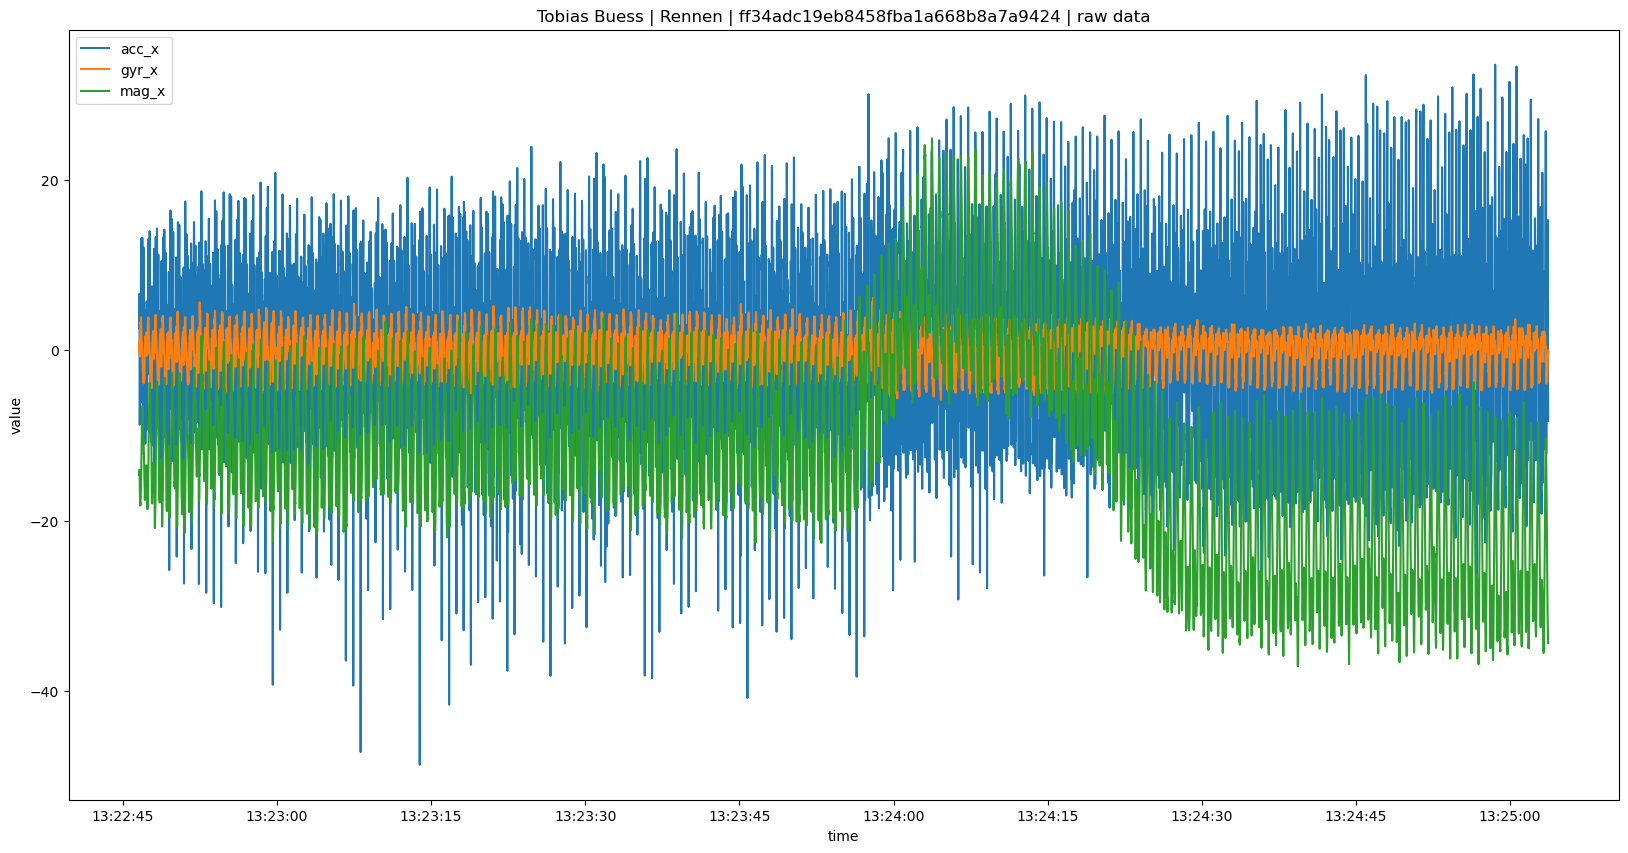

In [258]:
plt.figure(figsize=(20, 10))
plt.plot(tobias_pull_calibrated["timestamp"].values, tobias_pull_calibrated["Accelerometer_x"].values, label="acc_x")
plt.plot(tobias_pull_calibrated["timestamp"].values, tobias_pull_calibrated["Gyroscope_x"].values, label="gyr_x")
plt.plot(tobias_pull_calibrated["timestamp"].values, tobias_pull_calibrated["Magnetometer_x"].values, label="mag_x")
plt.xlabel("time")
plt.ylabel("value")
plt.title("Tobias Buess | Rennen | ff34adc19eb8458fba1a668b8a7a9424 | raw data")
plt.legend()
plt.show()

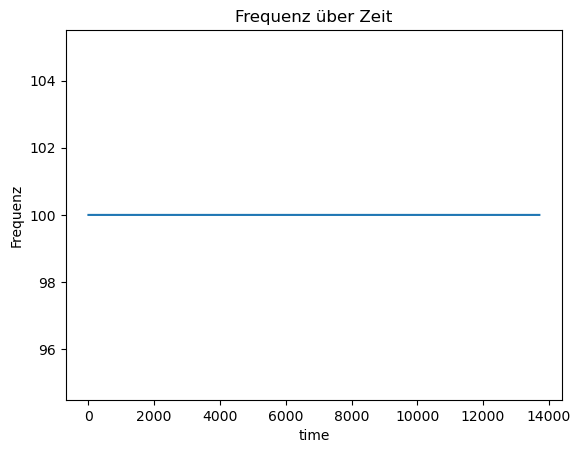

In [259]:
plt.plot(1 / (np.diff(tobias_pull_calibrated["timestamp"].values) / pd.Timedelta(1, "s")))
plt.title("Frequenz über Zeit")
plt.ylabel("Frequenz")
plt.xlabel("time")
plt.show() 

Frequenz ist konstant auf 100Hz

# Resampled data

In [260]:
resample_50Hz = pd.read_parquet("data/resample_50Hz.parquet")
resample_50Hz

Accelerometer_x  Accelerometer_y  Accelerometer_z   
timestamp                                                                    
2023-03-16 15:50:20.660         0.856745        -9.736820         0.020757  \
2023-03-16 15:50:20.680         0.336442        -7.226947         2.845873   
2023-03-16 15:50:20.700        -1.977320        -5.265067         5.953660   
2023-03-16 15:50:20.720        -5.969138        -0.849210         3.988554   
2023-03-16 15:50:20.740       -16.252441        16.919327        -5.084396   
...                                  ...              ...              ...   
2023-03-12 13:25:03.620         2.245690       -18.256710         2.483854   
2023-03-12 13:25:03.640         9.969309       -17.934803         3.881573   
2023-03-12 13:25:03.660        15.270597       -13.038113         7.037325   
2023-03-12 13:25:03.680         3.578034       -10.812859         7.249442   
2023-03-12 13:25:03.700        -4.368380        -5.661316         7.183708   

                         Gyroscope_x  Gyroscope_y  Gyroscope_z   
timestamp                                                        
2023-03-16 15:50:20.660     0.268116    -1.078746     1.059684  \
2023-03-16 15:50:20.680     0.084436    -0.911180     0.878822   
2023-03-16 15:50:20.700    -0.817032    -0.921044     0.375689   
2023-03-16 15:50:20.720    -1.020396    -1.018942    -0.168752   
2023-03-16 15:50:20.740     0.824533    -0.174754    -2.294776   
...                              ...          ...          ...   
2023-03-12 13:25:03.620    -3.412629     1.475331    -4.205945   
2023-03-12 13:25:03.640    -2.368905     0.157328    -3.334362   
2023-03-12 13:25:03.660    -1.447964    -1.472460    -3.465454   
2023-03-12 13:25:03.680    -0.878516    -3.433582    -2.865095   
2023-03-12 13:25:03.700    -0.454698    -3.775789    -2.106645   

                         Magnetometer_x  Magnetometer_y  Magnetometer_z   
timestamp                                                                 
2023-03-16 15:50:20.660      -17.852205       35.951828       -0.945442  \
2023-03-16 15:50:20.680      -17.261415       35.596741       -1.602486   
2023-03-16 15:50:20.700      -16.602587       35.248901       -1.095116   
2023-03-16 15:50:20.720      -16.014481       34.395584       -0.024513   
2023-03-16 15:50:20.740      -15.417032       33.737579        0.039505   
...                                 ...             ...             ...   
2023-03-12 13:25:03.620      -26.699999       36.299999       20.160000   
2023-03-12 13:25:03.640      -29.519999       32.700001       22.260000   
2023-03-12 13:25:03.660      -31.799999       28.320000       23.519999   
2023-03-12 13:25:03.680      -33.480000       24.660000       24.240000   
2023-03-12 13:25:03.700      -34.380001       21.660000       26.760000   

                        activity                              hash   
timestamp                                                            
2023-03-16 15:50:20.660   Rennen  040d27bca3b84ad198a2aa1129e4c8ac  \
2023-03-16 15:50:20.680   Rennen  040d27bca3b84ad198a2aa1129e4c8ac   
2023-03-16 15:50:20.700   Rennen  040d27bca3b84ad198a2aa1129e4c8ac   
2023-03-16 15:50:20.720   Rennen  040d27bca3b84ad198a2aa1129e4c8ac   
2023-03-16 15:50:20.740   Rennen  040d27bca3b84ad198a2aa1129e4c8ac   
...                          ...                               ...   
2023-03-12 13:25:03.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:25:03.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:25:03.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:25:03.680   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:25:03.700   Rennen  ff34adc19eb8458fba1a668b8a7a9424   

                                 person  
timestamp                                
2023-03-16 15:50:20.660  Manjavy_Kirupa  
2023-03-16 15:50:20.680  Manjavy_Kirupa  
2023-03-16 15:50:20.700  Manjavy_Kirupa  
2023-03-16 15:50:20.720  Manjavy_Kirupa  
2023-03-16 1

In [261]:
tobias_resampled_50Hz = resample_50Hz.loc[resample_50Hz.hash == id]
tobias_resampled_50Hz

Accelerometer_x  Accelerometer_y  Accelerometer_z   
timestamp                                                                    
2023-03-12 13:22:46.580         2.634803         2.672371        -4.872926  \
2023-03-12 13:22:46.600         6.587286         1.461584        -5.670835   
2023-03-12 13:22:46.620         1.475835         3.525508        10.847507   
2023-03-12 13:22:46.640        -8.754858        -8.557976       -15.892511   
2023-03-12 13:22:46.660        -6.636459       -16.891476        23.696314   
...                                  ...              ...              ...   
2023-03-12 13:25:03.620         2.245690       -18.256710         2.483854   
2023-03-12 13:25:03.640         9.969309       -17.934803         3.881573   
2023-03-12 13:25:03.660        15.270597       -13.038113         7.037325   
2023-03-12 13:25:03.680         3.578034       -10.812859         7.249442   
2023-03-12 13:25:03.700        -4.368380        -5.661316         7.183708   

                         Gyroscope_x  Gyroscope_y  Gyroscope_z   
timestamp                                                        
2023-03-12 13:22:46.580     0.800631     0.082314     0.226494  \
2023-03-12 13:22:46.600    -0.140468     0.470947    -0.708130   
2023-03-12 13:22:46.620     0.774730     3.652333    -0.844231   
2023-03-12 13:22:46.640    -0.036011     2.140563    -0.508011   
2023-03-12 13:22:46.660     0.845346    -1.587303    -0.463296   
...                              ...          ...          ...   
2023-03-12 13:25:03.620    -3.412629     1.475331    -4.205945   
2023-03-12 13:25:03.640    -2.368905     0.157328    -3.334362   
2023-03-12 13:25:03.660    -1.447964    -1.472460    -3.465454   
2023-03-12 13:25:03.680    -0.878516    -3.433582    -2.865095   
2023-03-12 13:25:03.700    -0.454698    -3.775789    -2.106645   

                         Magnetometer_x  Magnetometer_y  Magnetometer_z   
timestamp                                                                 
2023-03-12 13:22:46.580      -14.280000       31.320000       25.680000  \
2023-03-12 13:22:46.600      -14.340000       32.639999       25.080000   
2023-03-12 13:22:46.620      -14.040000       33.000000       24.539999   
2023-03-12 13:22:46.640      -15.960000       33.599998       24.000000   
2023-03-12 13:22:46.660      -17.520000       33.599998       22.320000   
...                                 ...             ...             ...   
2023-03-12 13:25:03.620      -26.699999       36.299999       20.160000   
2023-03-12 13:25:03.640      -29.519999       32.700001       22.260000   
2023-03-12 13:25:03.660      -31.799999       28.320000       23.519999   
2023-03-12 13:25:03.680      -33.480000       24.660000       24.240000   
2023-03-12 13:25:03.700      -34.380001       21.660000       26.760000   

                        activity                              hash   
timestamp                                                            
2023-03-12 13:22:46.580   Rennen  ff34adc19eb8458fba1a668b8a7a9424  \
2023-03-12 13:22:46.600   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
...                          ...                               ...   
2023-03-12 13:25:03.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:25:03.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:25:03.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:25:03.680   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:25:03.700   Rennen  ff34adc19eb8458fba1a668b8a7a9424   

                               person  
timestamp                              
2023-03-12 13:22:46.580  Tobias_Buess  
2023-03-12 13:22:46.600  Tobias_Buess  
2023-03-12 13:22:46.620  Tobias_Buess  
2023-03-12 13:22:46.640  Tobias_Buess  
2023-03-12 13:22:46.660 

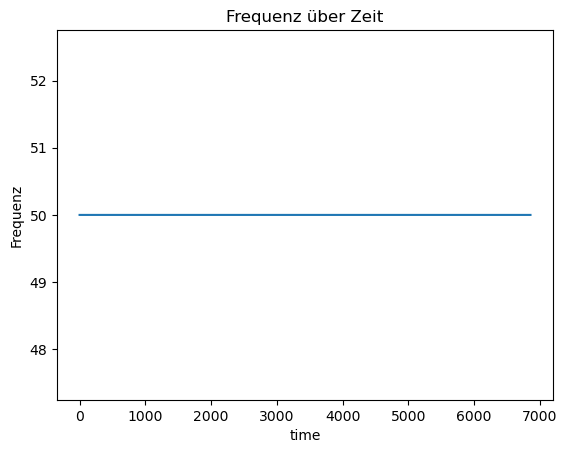

In [262]:
plt.plot(1 / (np.diff(tobias_resampled_50Hz.index.values) / pd.Timedelta(1, "s")))
plt.title("Frequenz über Zeit")
plt.ylabel("Frequenz")
plt.xlabel("time")
plt.show() 

Frequenz ist nach Resampling auf konstanten 50Hz, was in der Pipeline auch so eingestellt wurde.

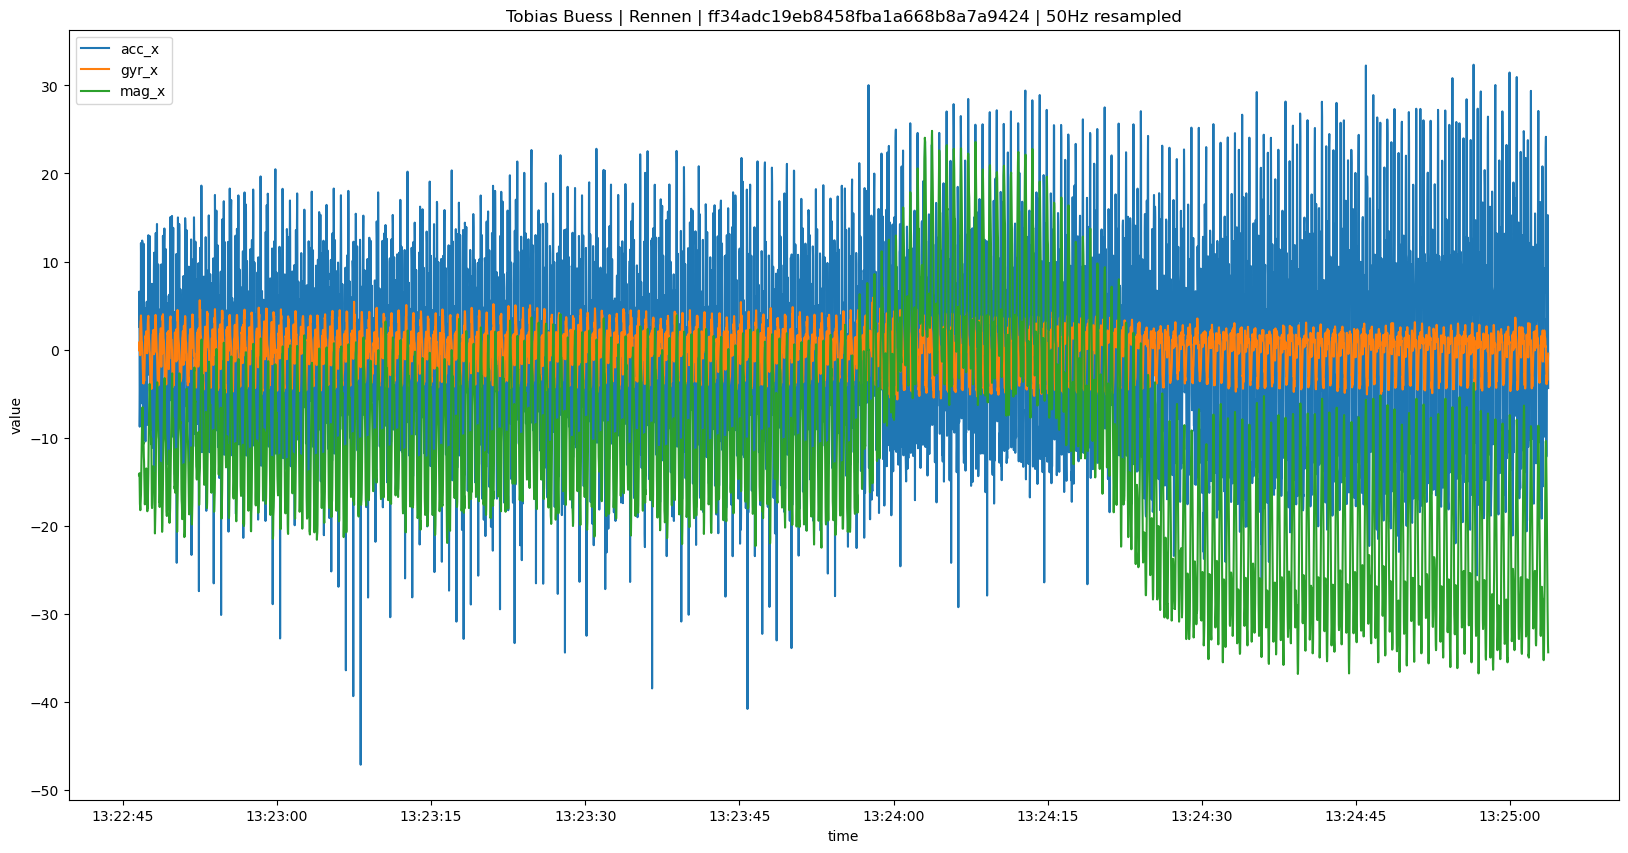

In [263]:
plt.figure(figsize=(20, 10))
plt.plot(tobias_resampled_50Hz.index.values, tobias_resampled_50Hz["Accelerometer_x"].values, label="acc_x")
plt.plot(tobias_resampled_50Hz.index.values, tobias_resampled_50Hz["Gyroscope_x"].values, label="gyr_x")
plt.plot(tobias_resampled_50Hz.index.values, tobias_resampled_50Hz["Magnetometer_x"].values, label="mag_x")
plt.xlabel("time")
plt.ylabel("value")
plt.title("Tobias Buess | Rennen | ff34adc19eb8458fba1a668b8a7a9424 | 50Hz resampled")
plt.legend()
plt.show()

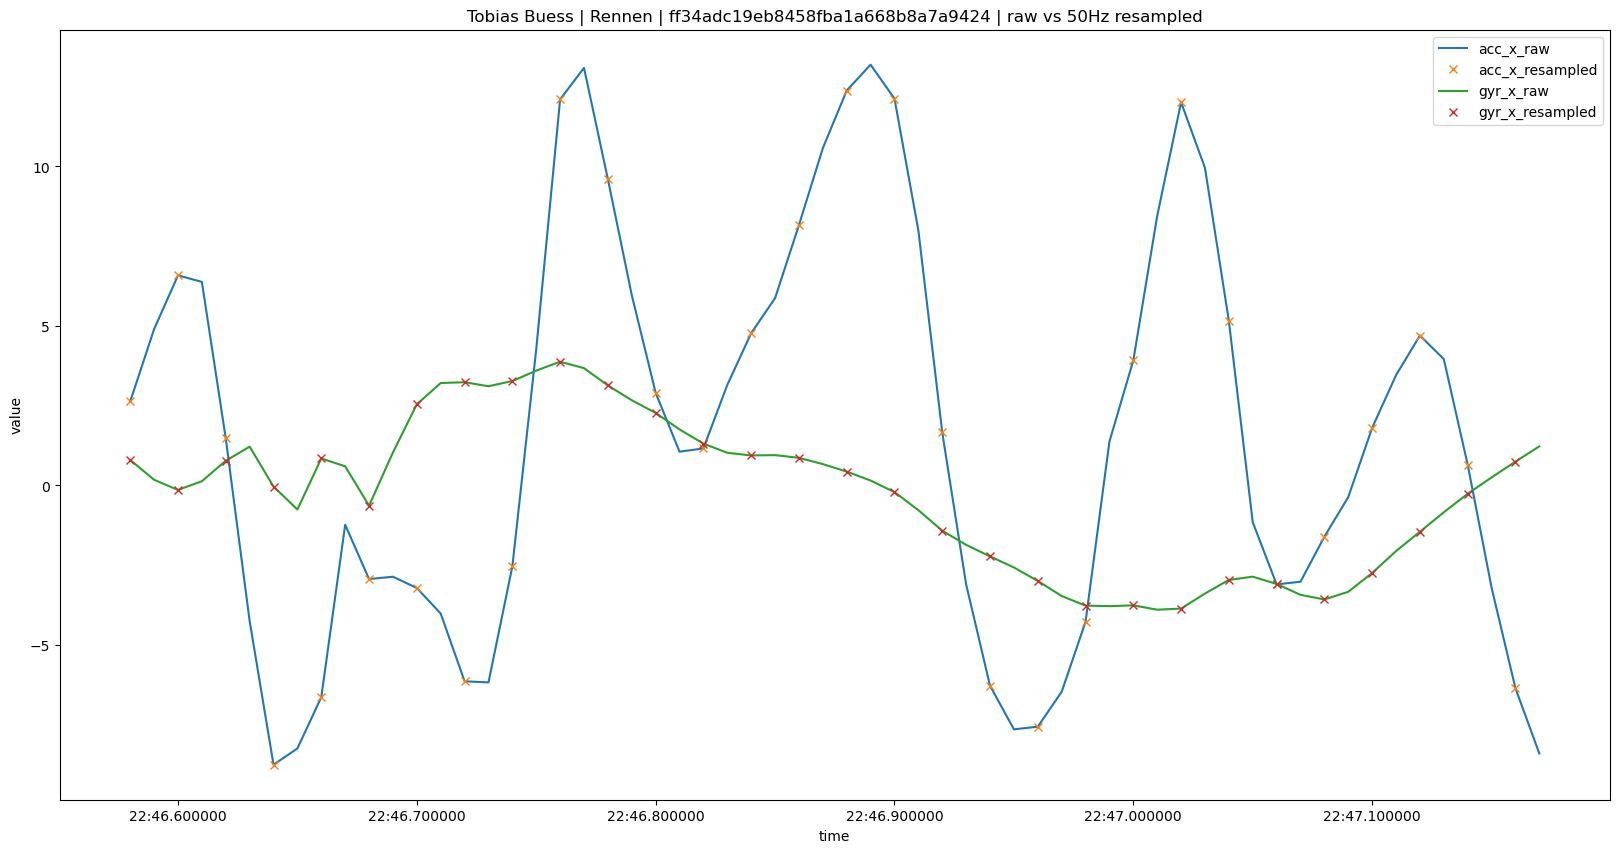

In [264]:
plt.figure(figsize=(20, 10))
plt.plot(tobias_pull_calibrated["timestamp"].values[:60], tobias_pull_calibrated["Accelerometer_x"].values[:60], label="acc_x_raw")
plt.plot(tobias_resampled_50Hz.index.values[:30], tobias_resampled_50Hz["Accelerometer_x"].values[:30], "x", label="acc_x_resampled")
plt.plot(tobias_pull_calibrated["timestamp"].values[:60], tobias_pull_calibrated["Gyroscope_x"].values[:60], label="gyr_x_raw")
plt.plot(tobias_resampled_50Hz.index.values[:30], tobias_resampled_50Hz["Gyroscope_x"].values[:30], "x", label="gyr_x_resampled")
plt.xlabel("time")
plt.ylabel("value")
plt.title("Tobias Buess | Rennen | ff34adc19eb8458fba1a668b8a7a9424 | raw vs 50Hz resampled")
plt.legend()
plt.show()

Kurven von Rohsignalen und resampleten Singalen sind überlappend.

Das resampling hat somit funktioniert.

# segmentate

In [265]:
with open("data/segmentate_5s.dill", "rb") as fr:
    segments_5s = load(fr)

In [266]:
id_key = None
for key in segments_5s.keys():
    if key[2] == id:
        id_key = key
        break
id_key

('Rennen', 'Tobias_Buess', 'ff34adc19eb8458fba1a668b8a7a9424')

In [267]:
segments_of_id = segments_5s[id_key]

In [268]:
first_segment = segments_of_id[0]
first_segment

Accelerometer_x  Accelerometer_y  Accelerometer_z   
timestamp                                                                    
2023-03-12 13:22:46.580         2.634803         2.672371        -4.872926  \
2023-03-12 13:22:46.600         6.587286         1.461584        -5.670835   
2023-03-12 13:22:46.620         1.475835         3.525508        10.847507   
2023-03-12 13:22:46.640        -8.754858        -8.557976       -15.892511   
2023-03-12 13:22:46.660        -6.636459       -16.891476        23.696314   
...                                  ...              ...              ...   
2023-03-12 13:22:51.480        -9.939420         7.093018         8.268422   
2023-03-12 13:22:51.500       -13.214779        12.419365         7.613528   
2023-03-12 13:22:51.520       -11.438312        15.822448         7.637514   
2023-03-12 13:22:51.540        -7.661373        16.554707         9.379020   
2023-03-12 13:22:51.560        -5.200958        12.116073         8.864466   

                         Gyroscope_x  Gyroscope_y  Gyroscope_z   
timestamp                                                        
2023-03-12 13:22:46.580     0.800631     0.082314     0.226494  \
2023-03-12 13:22:46.600    -0.140468     0.470947    -0.708130   
2023-03-12 13:22:46.620     0.774730     3.652333    -0.844231   
2023-03-12 13:22:46.640    -0.036011     2.140563    -0.508011   
2023-03-12 13:22:46.660     0.845346    -1.587303    -0.463296   
...                              ...          ...          ...   
2023-03-12 13:22:51.480     1.091524    -2.880749    -0.746126   
2023-03-12 13:22:51.500     1.647534    -1.411007     0.403400   
2023-03-12 13:22:51.520     1.731100     0.590432     1.549139   
2023-03-12 13:22:51.540     1.878686     2.180636     2.267761   
2023-03-12 13:22:51.560     2.328649     2.510870     2.110158   

                         Magnetometer_x  Magnetometer_y  Magnetometer_z   
timestamp                                                                 
2023-03-12 13:22:46.580      -14.280000       31.320000       25.680000  \
2023-03-12 13:22:46.600      -14.340000       32.639999       25.080000   
2023-03-12 13:22:46.620      -14.040000       33.000000       24.539999   
2023-03-12 13:22:46.640      -15.960000       33.599998       24.000000   
2023-03-12 13:22:46.660      -17.520000       33.599998       22.320000   
...                                 ...             ...             ...   
2023-03-12 13:22:51.480      -18.240000       24.719999       29.939999   
2023-03-12 13:22:51.500      -16.559999       24.779999       30.900000   
2023-03-12 13:22:51.520      -13.980000       26.099998       30.840000   
2023-03-12 13:22:51.540      -12.840000       26.400000       30.660000   
2023-03-12 13:22:51.560      -12.840000       27.539999       29.519999   

                        activity                              hash   
timestamp                                                            
2023-03-12 13:22:46.580   Rennen  ff34adc19eb8458fba1a668b8a7a9424  \
2023-03-12 13:22:46.600   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
...                          ...                               ...   
2023-03-12 13:22:51.480   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.500   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.520   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.540   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.560   Rennen  ff34adc19eb8458fba1a668b8a7a9424   

                               person segment_id  
timestamp                                         
2023-03-12 13:22:46.580  Tobias_Buess       2688  
2023-03-12 13:22:46.600  Tobias_Buess       2688  
2023-03-12 13:22:46.620  Tobias_Buess       2688  
2023-03-1

In [269]:
first_segment.index[-1] - first_segment.index[0]

Timedelta('0 days 00:00:04.980000')

Länge des Segments beträgt die eingestellten 5s.

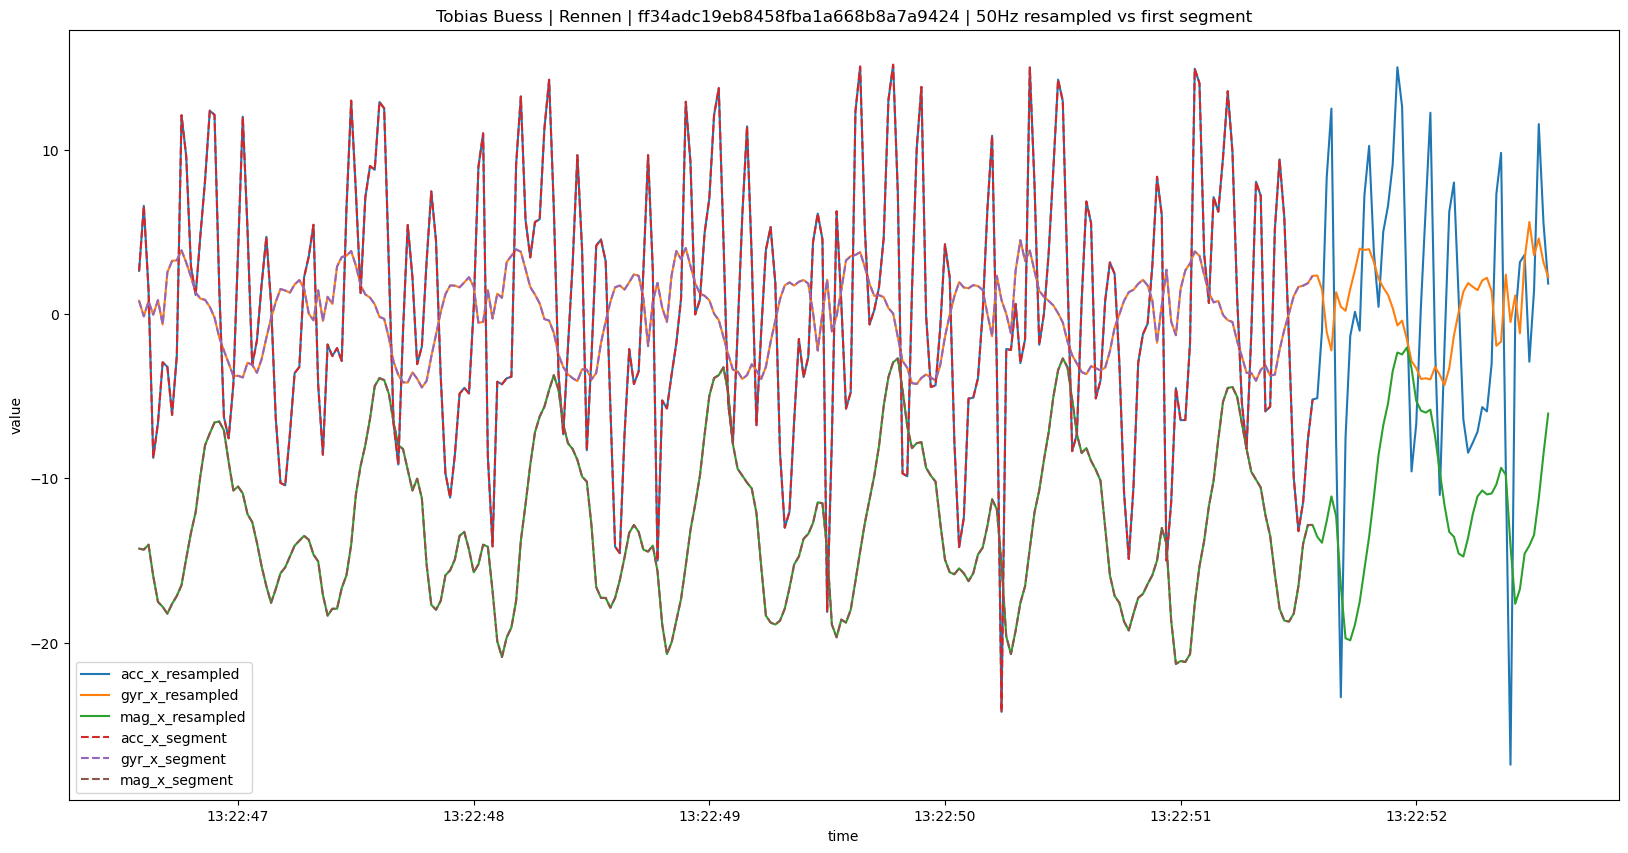

In [270]:
plt.figure(figsize=(20, 10))
plt.plot(tobias_resampled_50Hz.index.values[:300], tobias_resampled_50Hz["Accelerometer_x"].values[:300], label="acc_x_resampled")
plt.plot(tobias_resampled_50Hz.index.values[:300], tobias_resampled_50Hz["Gyroscope_x"].values[:300], label="gyr_x_resampled")
plt.plot(tobias_resampled_50Hz.index.values[:300], tobias_resampled_50Hz["Magnetometer_x"].values[:300], label="mag_x_resampled")
plt.plot(first_segment.index.values, first_segment["Accelerometer_x"].values, "--", label="acc_x_segment")
plt.plot(first_segment.index.values, first_segment["Gyroscope_x"].values, "--", label="gyr_x_segment")
plt.plot(first_segment.index.values, first_segment["Magnetometer_x"].values, "--", label="mag_x_segment")
plt.xlabel("time")
plt.ylabel("value")
plt.title("Tobias Buess | Rennen | ff34adc19eb8458fba1a668b8a7a9424 | 50Hz resampled vs first segment")
plt.legend()
plt.show()

In [271]:
concated:pd.DataFrame = pd.concat(segments_of_id, axis=0).drop(columns="segment_id")

tobias_resampled_50Hz.iloc[:len(concated)].equals(concated)

True

Aus den Segmenten kann (bis auf das ansonnsten unvollständige Segment) die Originalmessung wiederhergestellt werden.

Die Segmentierung hat somit funktioniert.

# FFT

In [272]:
with open("data/fft.dill", "rb") as fr:
    fft = load(fr)

In [273]:
first_segment_fft = fft[id_key][0]

In [274]:
display(first_segment_fft)
display(first_segment)

Accelerometer_x  Accelerometer_y  Accelerometer_z  Gyroscope_x   
0.0          0.611819         3.119241         1.149707     0.044972  \
0.2          0.226838         0.050948         0.271652     0.020791   
0.4          0.197013         0.074751         0.448108     0.015471   
0.6          0.294077         0.130519         0.089404     0.043136   
0.8          0.244730         0.196758         0.252747     0.047416   
...               ...              ...              ...          ...   
24.0         0.179859         0.008047         0.507238     0.061007   
24.2         0.205300         0.205918         1.350879     0.029961   
24.4         0.138723         0.139774         1.581019     0.035967   
24.6         0.195075         0.104335         0.588628     0.050565   
24.8         0.170346         0.060253         1.018222     0.030724   

      Gyroscope_y  Gyroscope_z  Magnetometer_x  Magnetometer_y   
0.0      0.068240     0.016772       25.700161       73.698235  \
0.2      0.037470     0.020316        0.372145        0.722084   
0.4      0.037667     0.050402        0.576800        0.181078   
0.6      0.061728     0.049011        0.266700        0.066422   
0.8      0.122763     0.091589        0.423589        0.210974   
...           ...          ...             ...             ...   
24.0     0.020137     0.010802        0.008152        0.009007   
24.2     0.010485     0.007638        0.003523        0.006568   
24.4     0.016673     0.010058        0.010875        0.004636   
24.6     0.100142     0.017401        0.001091        0.007496   
24.8     0.062152     0.007312        0.002228        0.005491   

      Magnetometer_z activity                              hash        person   
0.0        34.262402   Rennen  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess  \
0.2         0.435551   Rennen  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess   
0.4         0.561349   Rennen  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess   
0.6         0.526134   Rennen  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess   
0.8         0.953030   Rennen  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess   
...              ...      ...                               ...           ...   
24.0        0.016950   Rennen  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess   
24.2        0.009458   Rennen  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess   
24.4        0.012578   Rennen  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess   
24.6        0.008386   Rennen  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess   
24.8        0.006795   Rennen  ff34adc19eb8458fba1a668b8a7a9424  Tobias_Buess   

     segment_id  
0.0        2688  
0.2        2688  
0.4        2688  
0.6        2688  
0.8        2688  
...         ...  
24.0       2688  
24.2       2688  
24.4       2688  
24.6       2688  
24.8       2688  

[125 rows x 13 columns]

Accelerometer_x  Accelerometer_y  Accelerometer_z   
timestamp                                                                    
2023-03-12 13:22:46.580         2.634803         2.672371        -4.872926  \
2023-03-12 13:22:46.600         6.587286         1.461584        -5.670835   
2023-03-12 13:22:46.620         1.475835         3.525508        10.847507   
2023-03-12 13:22:46.640        -8.754858        -8.557976       -15.892511   
2023-03-12 13:22:46.660        -6.636459       -16.891476        23.696314   
...                                  ...              ...              ...   
2023-03-12 13:22:51.480        -9.939420         7.093018         8.268422   
2023-03-12 13:22:51.500       -13.214779        12.419365         7.613528   
2023-03-12 13:22:51.520       -11.438312        15.822448         7.637514   
2023-03-12 13:22:51.540        -7.661373        16.554707         9.379020   
2023-03-12 13:22:51.560        -5.200958        12.116073         8.864466   

                         Gyroscope_x  Gyroscope_y  Gyroscope_z   
timestamp                                                        
2023-03-12 13:22:46.580     0.800631     0.082314     0.226494  \
2023-03-12 13:22:46.600    -0.140468     0.470947    -0.708130   
2023-03-12 13:22:46.620     0.774730     3.652333    -0.844231   
2023-03-12 13:22:46.640    -0.036011     2.140563    -0.508011   
2023-03-12 13:22:46.660     0.845346    -1.587303    -0.463296   
...                              ...          ...          ...   
2023-03-12 13:22:51.480     1.091524    -2.880749    -0.746126   
2023-03-12 13:22:51.500     1.647534    -1.411007     0.403400   
2023-03-12 13:22:51.520     1.731100     0.590432     1.549139   
2023-03-12 13:22:51.540     1.878686     2.180636     2.267761   
2023-03-12 13:22:51.560     2.328649     2.510870     2.110158   

                         Magnetometer_x  Magnetometer_y  Magnetometer_z   
timestamp                                                                 
2023-03-12 13:22:46.580      -14.280000       31.320000       25.680000  \
2023-03-12 13:22:46.600      -14.340000       32.639999       25.080000   
2023-03-12 13:22:46.620      -14.040000       33.000000       24.539999   
2023-03-12 13:22:46.640      -15.960000       33.599998       24.000000   
2023-03-12 13:22:46.660      -17.520000       33.599998       22.320000   
...                                 ...             ...             ...   
2023-03-12 13:22:51.480      -18.240000       24.719999       29.939999   
2023-03-12 13:22:51.500      -16.559999       24.779999       30.900000   
2023-03-12 13:22:51.520      -13.980000       26.099998       30.840000   
2023-03-12 13:22:51.540      -12.840000       26.400000       30.660000   
2023-03-12 13:22:51.560      -12.840000       27.539999       29.519999   

                        activity                              hash   
timestamp                                                            
2023-03-12 13:22:46.580   Rennen  ff34adc19eb8458fba1a668b8a7a9424  \
2023-03-12 13:22:46.600   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
...                          ...                               ...   
2023-03-12 13:22:51.480   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.500   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.520   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.540   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.560   Rennen  ff34adc19eb8458fba1a668b8a7a9424   

                               person segment_id  
timestamp                                         
2023-03-12 13:22:46.580  Tobias_Buess       2688  
2023-03-12 13:22:46.600  Tobias_Buess       2688  
2023-03-12 13:22:46.620  Tobias_Buess       2688  
2023-03-1

Die numerischen Spalten (bis auf segment_id) des FFT Segments wurde in das Frequenzspektrum transformiert (Frequenzen auf der Index). Ansonnsten hat es dieselben Spalten wie das unbearbeitete erste Segment von Aufnahme: ff34adc19eb8458fba1a668b8a7a9424.

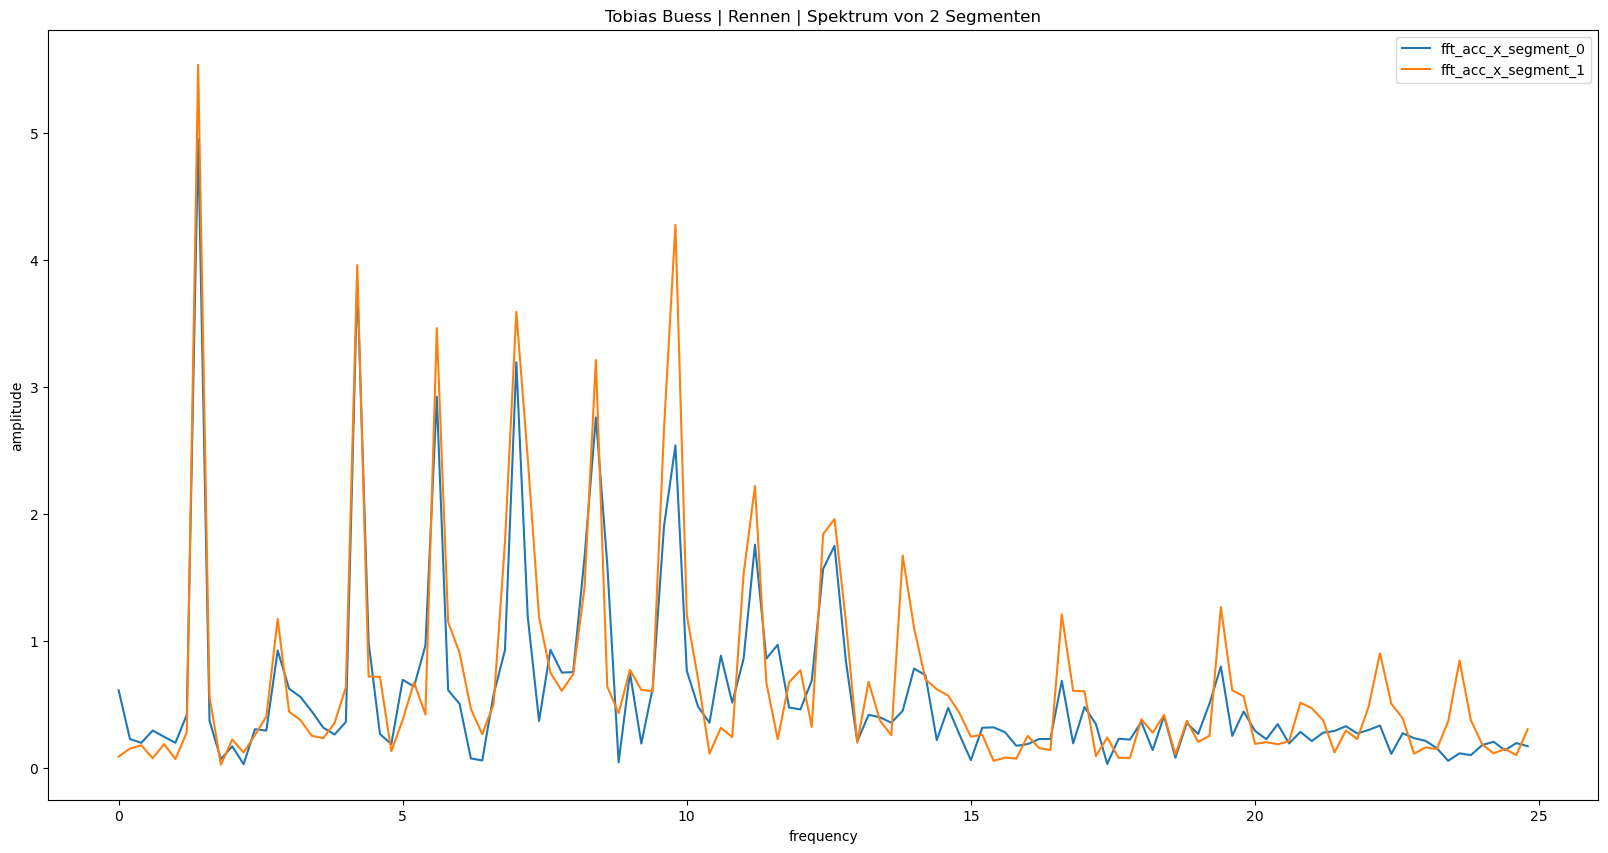

In [275]:
plt.figure(figsize=(20, 10))
plt.plot(fft[id_key][0].index.values, fft[id_key][0]["Accelerometer_x"].values, label="fft_acc_x_segment_0")
plt.plot(fft[id_key][1].index.values, fft[id_key][1]["Accelerometer_x"].values, label="fft_acc_x_segment_1")
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.title("Tobias Buess | Rennen | Spektrum von 2 Segmenten")
plt.legend()
plt.show()

Frequenzspektrum der ersten beiden Segmenten sehen ähnlich aus von den dominanten Frequenzkomponenten her.

Somit ist anzunehmen, dass die Transformation erfolgreich durchgeführt wurde.

# bandpass filter

In [276]:
with open("data/bandpass_ord3_low01_high100.dill", "rb") as fr:
    bandpass = load(fr)

In [277]:
first_segment_bandpass = bandpass[id_key][0]

In [278]:
display(first_segment_bandpass)
display(first_segment)

Accelerometer_x  Accelerometer_y  Accelerometer_z   
timestamp                                                                    
2023-03-12 13:22:46.580         0.026829         0.027212        -0.049619  \
2023-03-12 13:22:46.600         0.201323         0.151044        -0.306027   
2023-03-12 13:22:46.620         0.661329         0.425467        -0.753047   
2023-03-12 13:22:46.640         1.227542         0.736239        -1.137378   
2023-03-12 13:22:46.660         1.352747         0.603401        -1.270663   
...                                  ...              ...              ...   
2023-03-12 13:22:51.480         2.180365       -17.423233         1.133891   
2023-03-12 13:22:51.500         2.306567       -13.291930         2.577451   
2023-03-12 13:22:51.520         1.035921        -7.572521         4.247242   
2023-03-12 13:22:51.540        -1.405422        -1.139792         5.836718   
2023-03-12 13:22:51.560        -4.251681         5.103855         7.169729   

                         Gyroscope_x  Gyroscope_y  Gyroscope_z   
timestamp                                                        
2023-03-12 13:22:46.580     0.008152     0.000838     0.002306  \
2023-03-12 13:22:46.600     0.039363     0.008989     0.004330   
2023-03-12 13:22:46.620     0.095134     0.070891    -0.017971   
2023-03-12 13:22:46.640     0.163779     0.277938    -0.091729   
2023-03-12 13:22:46.660     0.234501     0.623193    -0.209470   
...                              ...          ...          ...   
2023-03-12 13:22:51.480    -2.912220    -0.919063    -2.504056   
2023-03-12 13:22:51.500    -2.174772    -1.314573    -2.228121   
2023-03-12 13:22:51.520    -1.281845    -1.737746    -1.805709   
2023-03-12 13:22:51.540    -0.341721    -1.944541    -1.224882   
2023-03-12 13:22:51.560     0.534094    -1.761613    -0.505389   

                         Magnetometer_x  Magnetometer_y  Magnetometer_z   
timestamp                                                                 
2023-03-12 13:22:46.580       -0.145407        0.318918        0.261489  \
2023-03-12 13:22:46.600       -0.873606        1.928161        1.563814   
2023-03-12 13:22:46.620       -2.557357        5.692010        4.555662   
2023-03-12 13:22:46.640       -5.087743       11.397071        8.981954   
2023-03-12 13:22:46.660       -8.051089       18.007348       13.936950   
...                                 ...             ...             ...   
2023-03-12 13:22:51.480      -15.751951       34.996999       22.060127   
2023-03-12 13:22:51.500      -16.998567       32.322418       24.667319   
2023-03-12 13:22:51.520      -17.830081       29.749855       26.874931   
2023-03-12 13:22:51.540      -18.078395       27.576899       28.641288   
2023-03-12 13:22:51.560      -17.692996       26.039425       29.920281   

                        activity                              hash   
timestamp                                                            
2023-03-12 13:22:46.580   Rennen  ff34adc19eb8458fba1a668b8a7a9424  \
2023-03-12 13:22:46.600   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
...                          ...                               ...   
2023-03-12 13:22:51.480   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.500   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.520   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.540   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.560   Rennen  ff34adc19eb8458fba1a668b8a7a9424   

                               person segment_id  
timestamp                                         
2023-03-12 13:22:46.580  Tobias_Buess       2688  
2023-03-12 13:22:46.600  Tobias_Buess       2688  
2023-03-12 13:22:46.620  Tobias_Buess       2688  
2023-03-1

Accelerometer_x  Accelerometer_y  Accelerometer_z   
timestamp                                                                    
2023-03-12 13:22:46.580         2.634803         2.672371        -4.872926  \
2023-03-12 13:22:46.600         6.587286         1.461584        -5.670835   
2023-03-12 13:22:46.620         1.475835         3.525508        10.847507   
2023-03-12 13:22:46.640        -8.754858        -8.557976       -15.892511   
2023-03-12 13:22:46.660        -6.636459       -16.891476        23.696314   
...                                  ...              ...              ...   
2023-03-12 13:22:51.480        -9.939420         7.093018         8.268422   
2023-03-12 13:22:51.500       -13.214779        12.419365         7.613528   
2023-03-12 13:22:51.520       -11.438312        15.822448         7.637514   
2023-03-12 13:22:51.540        -7.661373        16.554707         9.379020   
2023-03-12 13:22:51.560        -5.200958        12.116073         8.864466   

                         Gyroscope_x  Gyroscope_y  Gyroscope_z   
timestamp                                                        
2023-03-12 13:22:46.580     0.800631     0.082314     0.226494  \
2023-03-12 13:22:46.600    -0.140468     0.470947    -0.708130   
2023-03-12 13:22:46.620     0.774730     3.652333    -0.844231   
2023-03-12 13:22:46.640    -0.036011     2.140563    -0.508011   
2023-03-12 13:22:46.660     0.845346    -1.587303    -0.463296   
...                              ...          ...          ...   
2023-03-12 13:22:51.480     1.091524    -2.880749    -0.746126   
2023-03-12 13:22:51.500     1.647534    -1.411007     0.403400   
2023-03-12 13:22:51.520     1.731100     0.590432     1.549139   
2023-03-12 13:22:51.540     1.878686     2.180636     2.267761   
2023-03-12 13:22:51.560     2.328649     2.510870     2.110158   

                         Magnetometer_x  Magnetometer_y  Magnetometer_z   
timestamp                                                                 
2023-03-12 13:22:46.580      -14.280000       31.320000       25.680000  \
2023-03-12 13:22:46.600      -14.340000       32.639999       25.080000   
2023-03-12 13:22:46.620      -14.040000       33.000000       24.539999   
2023-03-12 13:22:46.640      -15.960000       33.599998       24.000000   
2023-03-12 13:22:46.660      -17.520000       33.599998       22.320000   
...                                 ...             ...             ...   
2023-03-12 13:22:51.480      -18.240000       24.719999       29.939999   
2023-03-12 13:22:51.500      -16.559999       24.779999       30.900000   
2023-03-12 13:22:51.520      -13.980000       26.099998       30.840000   
2023-03-12 13:22:51.540      -12.840000       26.400000       30.660000   
2023-03-12 13:22:51.560      -12.840000       27.539999       29.519999   

                        activity                              hash   
timestamp                                                            
2023-03-12 13:22:46.580   Rennen  ff34adc19eb8458fba1a668b8a7a9424  \
2023-03-12 13:22:46.600   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
...                          ...                               ...   
2023-03-12 13:22:51.480   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.500   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.520   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.540   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.560   Rennen  ff34adc19eb8458fba1a668b8a7a9424   

                               person segment_id  
timestamp                                         
2023-03-12 13:22:46.580  Tobias_Buess       2688  
2023-03-12 13:22:46.600  Tobias_Buess       2688  
2023-03-12 13:22:46.620  Tobias_Buess       2688  
2023-03-1

Das gefilterte Segment muss dieselbe Struktur besitzen wie das unbearbeitete.

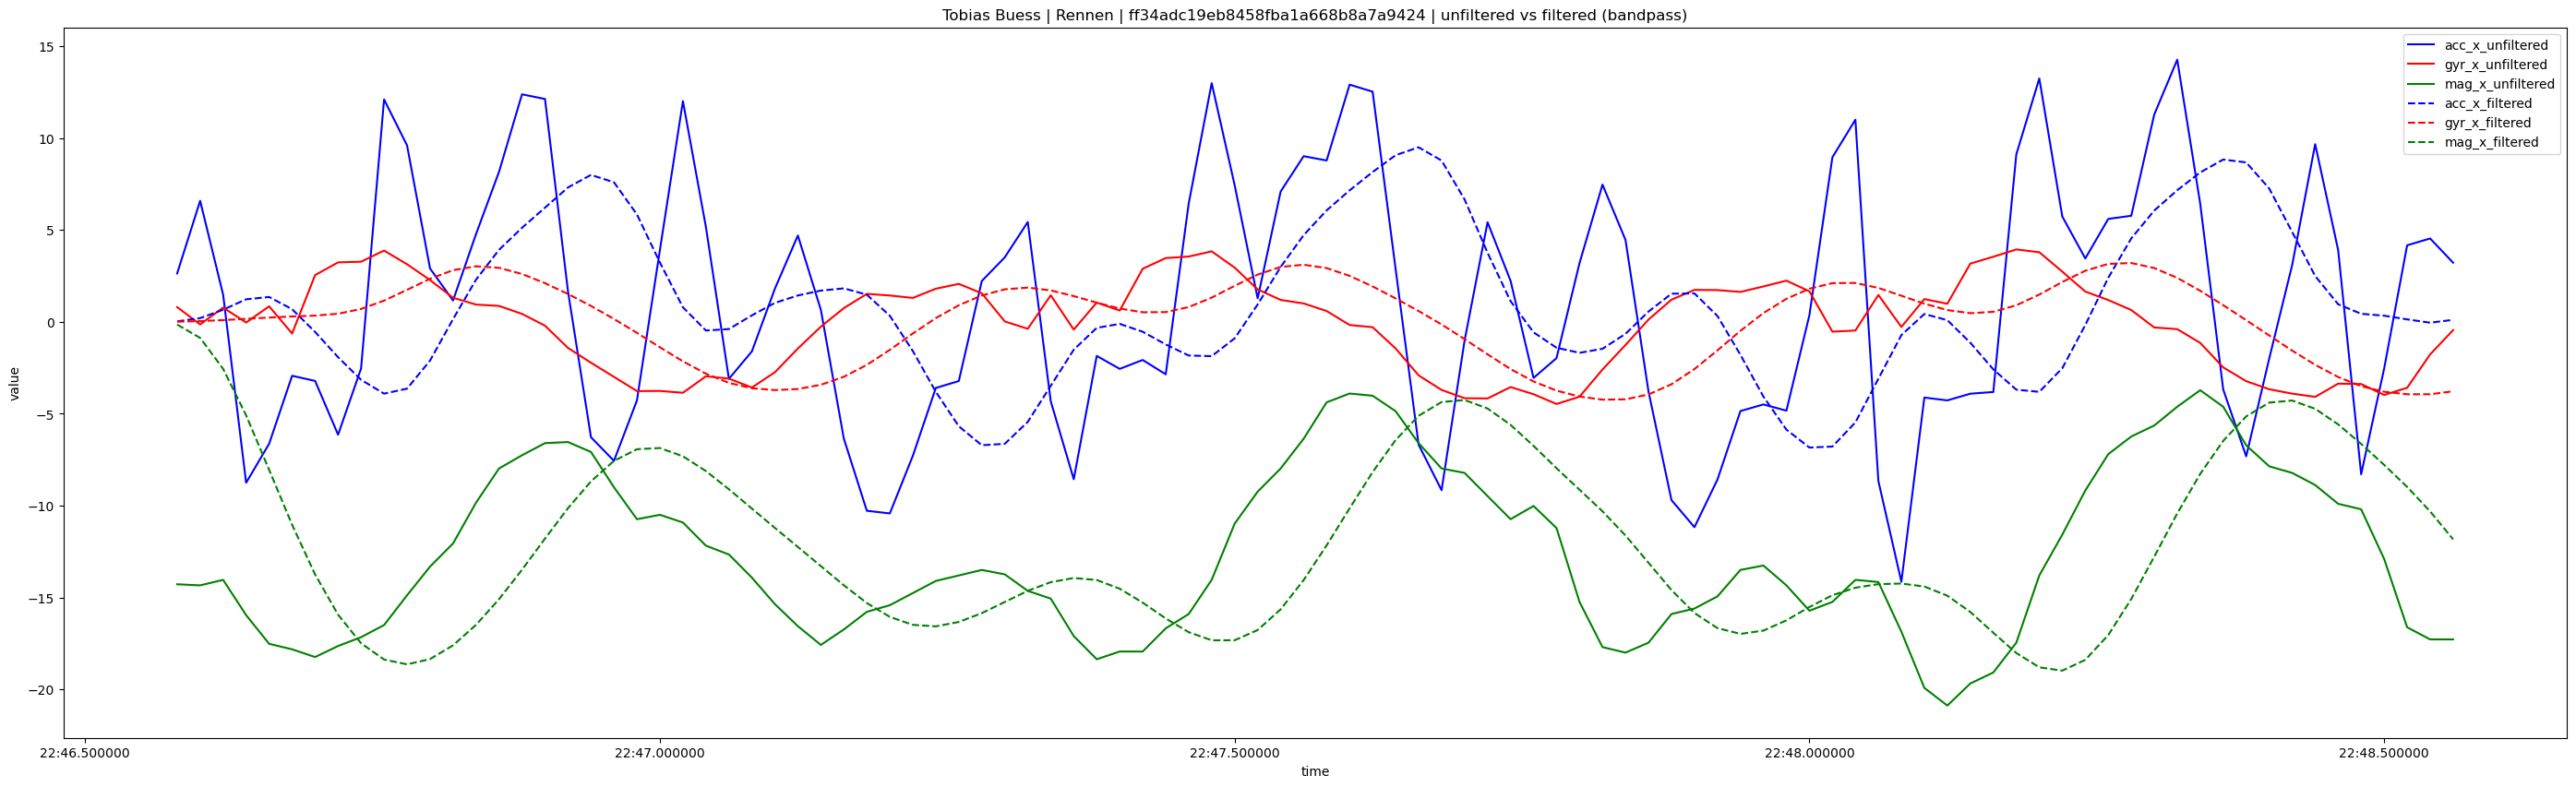

In [279]:
plt.figure(figsize=(35, 10))
plt.plot(first_segment.index.values[:100], first_segment["Accelerometer_x"].values[:100], label="acc_x_unfiltered", color="blue")
plt.plot(first_segment.index.values[:100], first_segment["Gyroscope_x"].values[:100], label="gyr_x_unfiltered", color="red")
plt.plot(first_segment.index.values[:100], first_segment["Magnetometer_x"].values[:100], label="mag_x_unfiltered", color="green")
plt.plot(first_segment_bandpass.index.values[:100], first_segment_bandpass["Accelerometer_x"].values[:100], '--', label="acc_x_filtered", color="blue")
plt.plot(first_segment_bandpass.index.values[:100], first_segment_bandpass["Gyroscope_x"].values[:100], '--', label="gyr_x_filtered", color="red")
plt.plot(first_segment_bandpass.index.values[:100], first_segment_bandpass["Magnetometer_x"].values[:100], '--', label="mag_x_filtered", color="green")
plt.xlabel("time")
plt.ylabel("value")
plt.title("Tobias Buess | Rennen | ff34adc19eb8458fba1a668b8a7a9424 | unfiltered vs filtered (bandpass)")
plt.legend()
plt.show()

Es wird erwartet, dass möglicherweise das Signal ungefiltert rekonstruiert wird aufgrund der cutoff Frequenzen.

Allerdings ist dies nicht der Fall.

Ein Fehler im Code ist nicht auszuschliessen.

Allerdings werden die Filter nicht verwendet, weshalbd dies zum jetzigen Zeitpunkt unproblematisch ist.

# lowpass filter

In [280]:
with open("data/lowpass_ord3_cut100.dill", "rb") as fr:
    lowpass = load(fr)

In [281]:
first_segment_lowpass = lowpass[id_key][0]

In [282]:
display(first_segment_lowpass)
display(first_segment)

Accelerometer_x  Accelerometer_y  Accelerometer_z   
timestamp                                                                    
2023-03-12 13:22:46.580         0.026829         0.027212        -0.049619  \
2023-03-12 13:22:46.600         0.201323         0.151044        -0.306027   
2023-03-12 13:22:46.620         0.661329         0.425467        -0.753047   
2023-03-12 13:22:46.640         1.227543         0.736239        -1.137378   
2023-03-12 13:22:46.660         1.352748         0.603401        -1.270663   
...                                  ...              ...              ...   
2023-03-12 13:22:51.480         2.180376       -17.423274         1.133900   
2023-03-12 13:22:51.500         2.306579       -13.291972         2.577461   
2023-03-12 13:22:51.520         1.035932        -7.572565         4.247251   
2023-03-12 13:22:51.540        -1.405412        -1.139836         5.836729   
2023-03-12 13:22:51.560        -4.251671         5.103811         7.169740   

                         Gyroscope_x  Gyroscope_y  Gyroscope_z   
timestamp                                                        
2023-03-12 13:22:46.580     0.008152     0.000838     0.002306  \
2023-03-12 13:22:46.600     0.039363     0.008989     0.004330   
2023-03-12 13:22:46.620     0.095134     0.070891    -0.017971   
2023-03-12 13:22:46.640     0.163779     0.277938    -0.091729   
2023-03-12 13:22:46.660     0.234501     0.623193    -0.209470   
...                              ...          ...          ...   
2023-03-12 13:22:51.480    -2.912220    -0.919061    -2.504056   
2023-03-12 13:22:51.500    -2.174773    -1.314572    -2.228121   
2023-03-12 13:22:51.520    -1.281846    -1.737745    -1.805709   
2023-03-12 13:22:51.540    -0.341722    -1.944540    -1.224882   
2023-03-12 13:22:51.560     0.534093    -1.761612    -0.505389   

                         Magnetometer_x  Magnetometer_y  Magnetometer_z   
timestamp                                                                 
2023-03-12 13:22:46.580       -0.145407        0.318918        0.261489  \
2023-03-12 13:22:46.600       -0.873606        1.928162        1.563815   
2023-03-12 13:22:46.620       -2.557357        5.692012        4.555663   
2023-03-12 13:22:46.640       -5.087744       11.397074        8.981957   
2023-03-12 13:22:46.660       -8.051091       18.007353       13.936954   
...                                 ...             ...             ...   
2023-03-12 13:22:51.480      -15.752260       34.997900       22.060534   
2023-03-12 13:22:51.500      -16.998877       32.323322       24.667727   
2023-03-12 13:22:51.520      -17.830393       29.750763       26.875342   
2023-03-12 13:22:51.540      -18.078709       27.577809       28.641701   
2023-03-12 13:22:51.560      -17.693312       26.040339       29.920697   

                        activity                              hash   
timestamp                                                            
2023-03-12 13:22:46.580   Rennen  ff34adc19eb8458fba1a668b8a7a9424  \
2023-03-12 13:22:46.600   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
...                          ...                               ...   
2023-03-12 13:22:51.480   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.500   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.520   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.540   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.560   Rennen  ff34adc19eb8458fba1a668b8a7a9424   

                               person segment_id  
timestamp                                         
2023-03-12 13:22:46.580  Tobias_Buess       2688  
2023-03-12 13:22:46.600  Tobias_Buess       2688  
2023-03-12 13:22:46.620  Tobias_Buess       2688  
2023-03-1

Accelerometer_x  Accelerometer_y  Accelerometer_z   
timestamp                                                                    
2023-03-12 13:22:46.580         2.634803         2.672371        -4.872926  \
2023-03-12 13:22:46.600         6.587286         1.461584        -5.670835   
2023-03-12 13:22:46.620         1.475835         3.525508        10.847507   
2023-03-12 13:22:46.640        -8.754858        -8.557976       -15.892511   
2023-03-12 13:22:46.660        -6.636459       -16.891476        23.696314   
...                                  ...              ...              ...   
2023-03-12 13:22:51.480        -9.939420         7.093018         8.268422   
2023-03-12 13:22:51.500       -13.214779        12.419365         7.613528   
2023-03-12 13:22:51.520       -11.438312        15.822448         7.637514   
2023-03-12 13:22:51.540        -7.661373        16.554707         9.379020   
2023-03-12 13:22:51.560        -5.200958        12.116073         8.864466   

                         Gyroscope_x  Gyroscope_y  Gyroscope_z   
timestamp                                                        
2023-03-12 13:22:46.580     0.800631     0.082314     0.226494  \
2023-03-12 13:22:46.600    -0.140468     0.470947    -0.708130   
2023-03-12 13:22:46.620     0.774730     3.652333    -0.844231   
2023-03-12 13:22:46.640    -0.036011     2.140563    -0.508011   
2023-03-12 13:22:46.660     0.845346    -1.587303    -0.463296   
...                              ...          ...          ...   
2023-03-12 13:22:51.480     1.091524    -2.880749    -0.746126   
2023-03-12 13:22:51.500     1.647534    -1.411007     0.403400   
2023-03-12 13:22:51.520     1.731100     0.590432     1.549139   
2023-03-12 13:22:51.540     1.878686     2.180636     2.267761   
2023-03-12 13:22:51.560     2.328649     2.510870     2.110158   

                         Magnetometer_x  Magnetometer_y  Magnetometer_z   
timestamp                                                                 
2023-03-12 13:22:46.580      -14.280000       31.320000       25.680000  \
2023-03-12 13:22:46.600      -14.340000       32.639999       25.080000   
2023-03-12 13:22:46.620      -14.040000       33.000000       24.539999   
2023-03-12 13:22:46.640      -15.960000       33.599998       24.000000   
2023-03-12 13:22:46.660      -17.520000       33.599998       22.320000   
...                                 ...             ...             ...   
2023-03-12 13:22:51.480      -18.240000       24.719999       29.939999   
2023-03-12 13:22:51.500      -16.559999       24.779999       30.900000   
2023-03-12 13:22:51.520      -13.980000       26.099998       30.840000   
2023-03-12 13:22:51.540      -12.840000       26.400000       30.660000   
2023-03-12 13:22:51.560      -12.840000       27.539999       29.519999   

                        activity                              hash   
timestamp                                                            
2023-03-12 13:22:46.580   Rennen  ff34adc19eb8458fba1a668b8a7a9424  \
2023-03-12 13:22:46.600   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
...                          ...                               ...   
2023-03-12 13:22:51.480   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.500   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.520   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.540   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.560   Rennen  ff34adc19eb8458fba1a668b8a7a9424   

                               person segment_id  
timestamp                                         
2023-03-12 13:22:46.580  Tobias_Buess       2688  
2023-03-12 13:22:46.600  Tobias_Buess       2688  
2023-03-12 13:22:46.620  Tobias_Buess       2688  
2023-03-1

Gleiche Struktur.

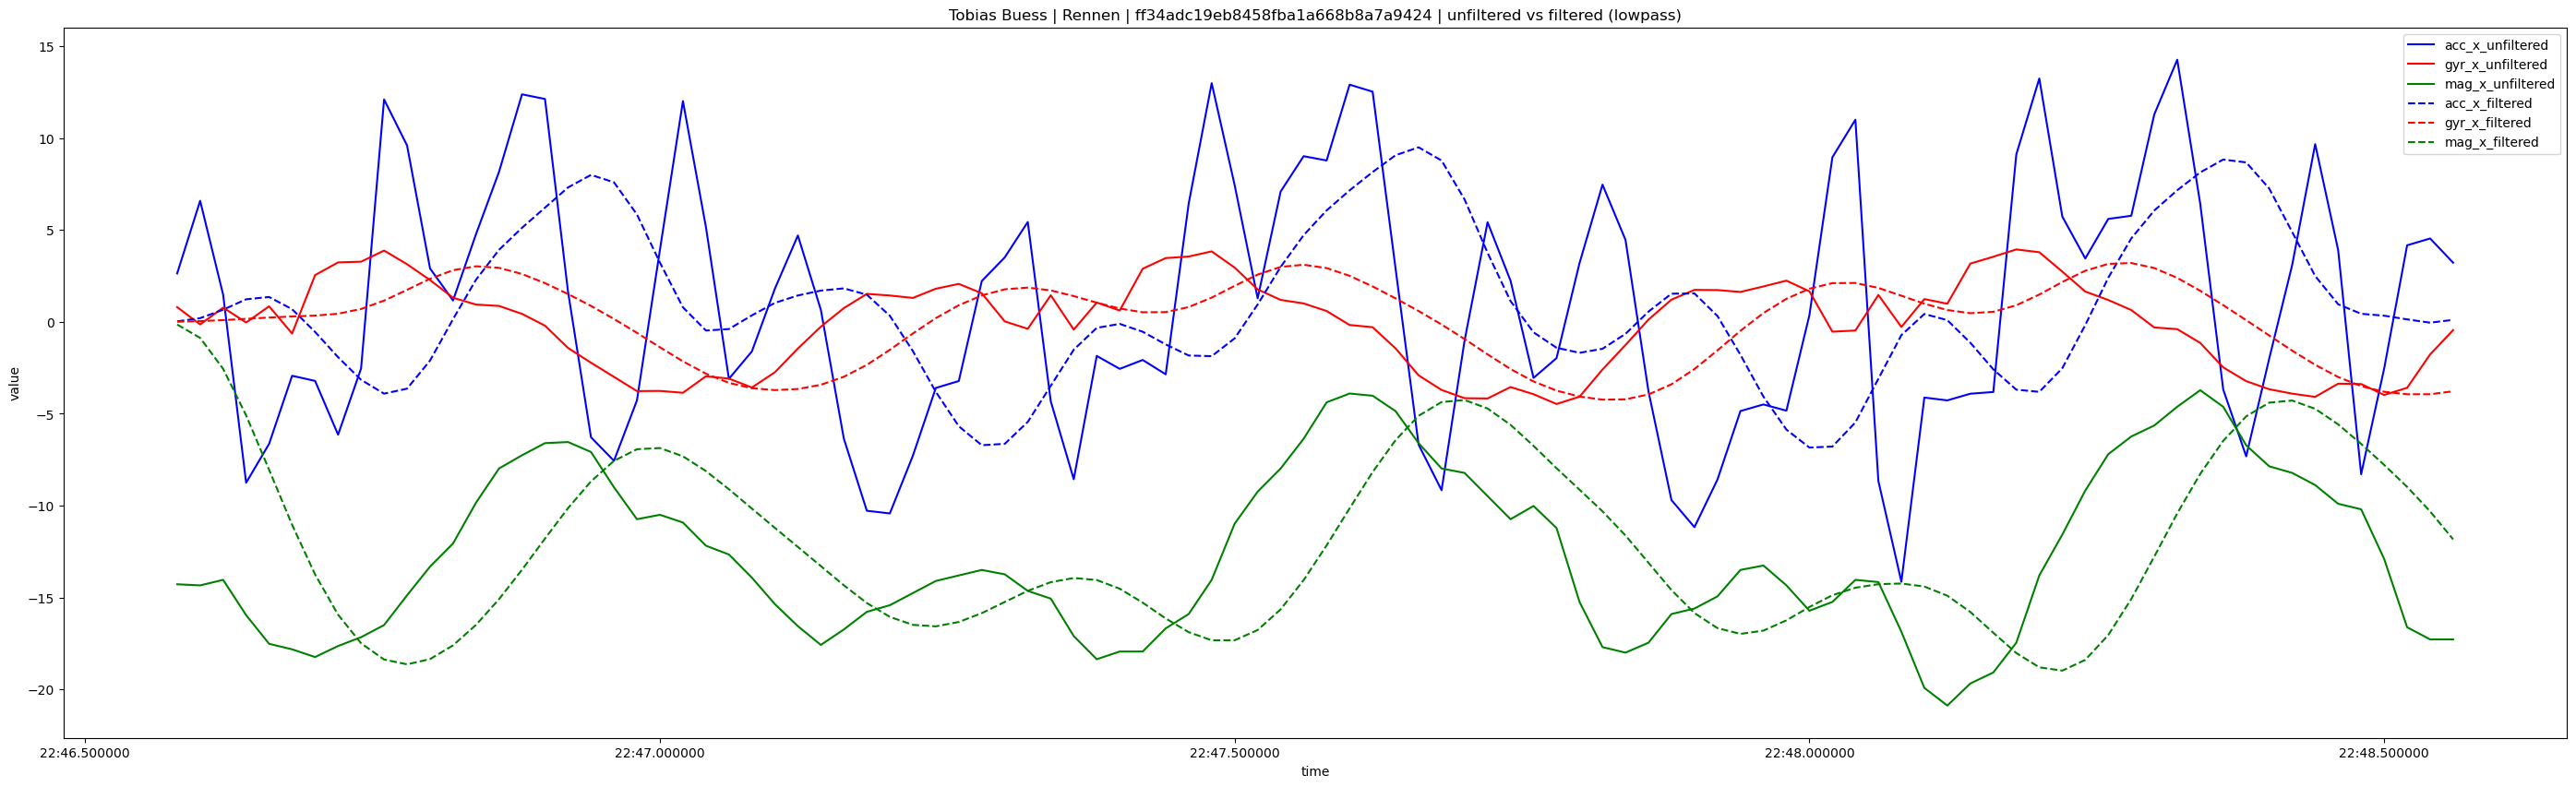

In [283]:
plt.figure(figsize=(35, 10))
plt.plot(first_segment.index.values[:100], first_segment["Accelerometer_x"].values[:100], label="acc_x_unfiltered", color="blue")
plt.plot(first_segment.index.values[:100], first_segment["Gyroscope_x"].values[:100], label="gyr_x_unfiltered", color="red")
plt.plot(first_segment.index.values[:100], first_segment["Magnetometer_x"].values[:100], label="mag_x_unfiltered", color="green")
plt.plot(first_segment_lowpass.index.values[:100], first_segment_lowpass["Accelerometer_x"].values[:100], '--', label="acc_x_filtered", color="blue")
plt.plot(first_segment_lowpass.index.values[:100], first_segment_lowpass["Gyroscope_x"].values[:100], '--', label="gyr_x_filtered", color="red")
plt.plot(first_segment_lowpass.index.values[:100], first_segment_lowpass["Magnetometer_x"].values[:100], '--', label="mag_x_filtered", color="green")
plt.xlabel("time")
plt.ylabel("value")
plt.title("Tobias Buess | Rennen | ff34adc19eb8458fba1a668b8a7a9424 | unfiltered vs filtered (lowpass)")
plt.legend()
plt.show()

Gleiches Problem wie beim Bandpass.

# highpass filter

In [284]:
with open("data/highpass_ord3_cut01.dill", "rb") as fr:
    highpass = load(fr)

In [285]:
first_segment_highpass = highpass[id_key][0]

In [286]:
display(first_segment_highpass)
display(first_segment)

Accelerometer_x  Accelerometer_y  Accelerometer_z   
timestamp                                                                    
2023-03-12 13:22:46.580         2.634802         2.672371        -4.872926  \
2023-03-12 13:22:46.600         6.587285         1.461584        -5.670835   
2023-03-12 13:22:46.620         1.475834         3.525508        10.847508   
2023-03-12 13:22:46.640        -8.754859        -8.557976       -15.892511   
2023-03-12 13:22:46.660        -6.636459       -16.891475        23.696314   
...                                  ...              ...              ...   
2023-03-12 13:22:51.480        -9.939432         7.093063         8.268411   
2023-03-12 13:22:51.500       -13.214790        12.419409         7.613517   
2023-03-12 13:22:51.520       -11.438321        15.822491         7.637502   
2023-03-12 13:22:51.540        -7.661382        16.554748         9.379007   
2023-03-12 13:22:51.560        -5.200966        12.116112         8.864452   

                         Gyroscope_x  Gyroscope_y  Gyroscope_z   
timestamp                                                        
2023-03-12 13:22:46.580     0.800631     0.082314     0.226494  \
2023-03-12 13:22:46.600    -0.140469     0.470947    -0.708130   
2023-03-12 13:22:46.620     0.774730     3.652333    -0.844231   
2023-03-12 13:22:46.640    -0.036011     2.140563    -0.508011   
2023-03-12 13:22:46.660     0.845346    -1.587303    -0.463295   
...                              ...          ...          ...   
2023-03-12 13:22:51.480     1.091526    -2.880750    -0.746126   
2023-03-12 13:22:51.500     1.647535    -1.411008     0.403401   
2023-03-12 13:22:51.520     1.731102     0.590431     1.549139   
2023-03-12 13:22:51.540     1.878686     2.180635     2.267761   
2023-03-12 13:22:51.560     2.328650     2.510869     2.110158   

                         Magnetometer_x  Magnetometer_y  Magnetometer_z   
timestamp                                                                 
2023-03-12 13:22:46.580      -14.279999       31.319998       25.679999  \
2023-03-12 13:22:46.600      -14.339998       32.639995       25.079996   
2023-03-12 13:22:46.620      -14.039996       32.999992       24.539993   
2023-03-12 13:22:46.640      -15.959995       33.599987       23.999991   
2023-03-12 13:22:46.660      -17.519994       33.599984       22.319989   
...                                 ...             ...             ...   
2023-03-12 13:22:51.480      -18.239683       24.719085       29.939582   
2023-03-12 13:22:51.500      -16.559681       24.779082       30.899580   
2023-03-12 13:22:51.520      -13.979680       26.099079       30.839577   
2023-03-12 13:22:51.540      -12.839679       26.399078       30.659574   
2023-03-12 13:22:51.560      -12.839678       27.539074       29.519569   

                        activity                              hash   
timestamp                                                            
2023-03-12 13:22:46.580   Rennen  ff34adc19eb8458fba1a668b8a7a9424  \
2023-03-12 13:22:46.600   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
...                          ...                               ...   
2023-03-12 13:22:51.480   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.500   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.520   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.540   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.560   Rennen  ff34adc19eb8458fba1a668b8a7a9424   

                               person segment_id  
timestamp                                         
2023-03-12 13:22:46.580  Tobias_Buess       2688  
2023-03-12 13:22:46.600  Tobias_Buess       2688  
2023-03-12 13:22:46.620  Tobias_Buess       2688  
2023-03-1

Accelerometer_x  Accelerometer_y  Accelerometer_z   
timestamp                                                                    
2023-03-12 13:22:46.580         2.634803         2.672371        -4.872926  \
2023-03-12 13:22:46.600         6.587286         1.461584        -5.670835   
2023-03-12 13:22:46.620         1.475835         3.525508        10.847507   
2023-03-12 13:22:46.640        -8.754858        -8.557976       -15.892511   
2023-03-12 13:22:46.660        -6.636459       -16.891476        23.696314   
...                                  ...              ...              ...   
2023-03-12 13:22:51.480        -9.939420         7.093018         8.268422   
2023-03-12 13:22:51.500       -13.214779        12.419365         7.613528   
2023-03-12 13:22:51.520       -11.438312        15.822448         7.637514   
2023-03-12 13:22:51.540        -7.661373        16.554707         9.379020   
2023-03-12 13:22:51.560        -5.200958        12.116073         8.864466   

                         Gyroscope_x  Gyroscope_y  Gyroscope_z   
timestamp                                                        
2023-03-12 13:22:46.580     0.800631     0.082314     0.226494  \
2023-03-12 13:22:46.600    -0.140468     0.470947    -0.708130   
2023-03-12 13:22:46.620     0.774730     3.652333    -0.844231   
2023-03-12 13:22:46.640    -0.036011     2.140563    -0.508011   
2023-03-12 13:22:46.660     0.845346    -1.587303    -0.463296   
...                              ...          ...          ...   
2023-03-12 13:22:51.480     1.091524    -2.880749    -0.746126   
2023-03-12 13:22:51.500     1.647534    -1.411007     0.403400   
2023-03-12 13:22:51.520     1.731100     0.590432     1.549139   
2023-03-12 13:22:51.540     1.878686     2.180636     2.267761   
2023-03-12 13:22:51.560     2.328649     2.510870     2.110158   

                         Magnetometer_x  Magnetometer_y  Magnetometer_z   
timestamp                                                                 
2023-03-12 13:22:46.580      -14.280000       31.320000       25.680000  \
2023-03-12 13:22:46.600      -14.340000       32.639999       25.080000   
2023-03-12 13:22:46.620      -14.040000       33.000000       24.539999   
2023-03-12 13:22:46.640      -15.960000       33.599998       24.000000   
2023-03-12 13:22:46.660      -17.520000       33.599998       22.320000   
...                                 ...             ...             ...   
2023-03-12 13:22:51.480      -18.240000       24.719999       29.939999   
2023-03-12 13:22:51.500      -16.559999       24.779999       30.900000   
2023-03-12 13:22:51.520      -13.980000       26.099998       30.840000   
2023-03-12 13:22:51.540      -12.840000       26.400000       30.660000   
2023-03-12 13:22:51.560      -12.840000       27.539999       29.519999   

                        activity                              hash   
timestamp                                                            
2023-03-12 13:22:46.580   Rennen  ff34adc19eb8458fba1a668b8a7a9424  \
2023-03-12 13:22:46.600   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
...                          ...                               ...   
2023-03-12 13:22:51.480   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.500   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.520   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.540   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.560   Rennen  ff34adc19eb8458fba1a668b8a7a9424   

                               person segment_id  
timestamp                                         
2023-03-12 13:22:46.580  Tobias_Buess       2688  
2023-03-12 13:22:46.600  Tobias_Buess       2688  
2023-03-12 13:22:46.620  Tobias_Buess       2688  
2023-03-1

Gleiche Struktur.

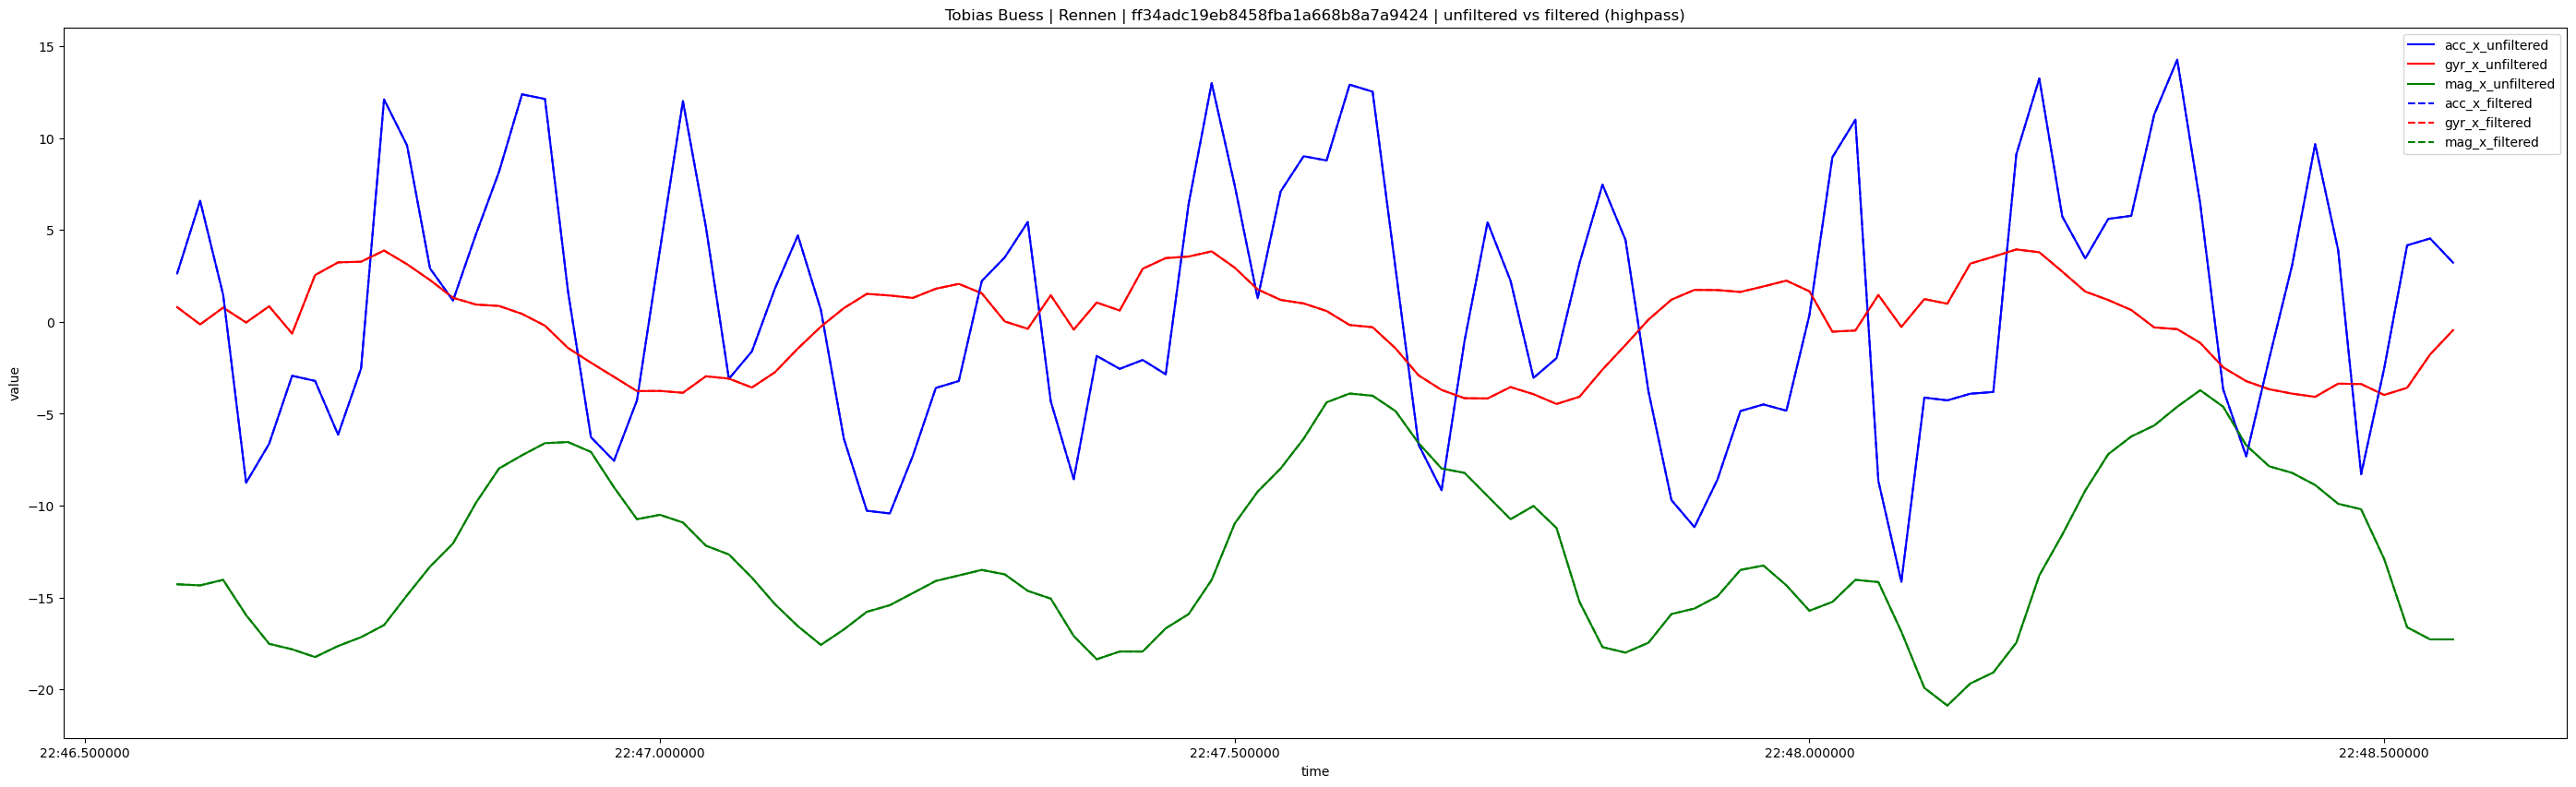

In [287]:
plt.figure(figsize=(35, 10))
plt.plot(first_segment.index.values[:100], first_segment["Accelerometer_x"].values[:100], label="acc_x_unfiltered", color="blue")
plt.plot(first_segment.index.values[:100], first_segment["Gyroscope_x"].values[:100], label="gyr_x_unfiltered", color="red")
plt.plot(first_segment.index.values[:100], first_segment["Magnetometer_x"].values[:100], label="mag_x_unfiltered", color="green")
plt.plot(first_segment_highpass.index.values[:100], first_segment_highpass["Accelerometer_x"].values[:100], '--', label="acc_x_filtered", color="blue")
plt.plot(first_segment_highpass.index.values[:100], first_segment_highpass["Gyroscope_x"].values[:100], '--', label="gyr_x_filtered", color="red")
plt.plot(first_segment_highpass.index.values[:100], first_segment_highpass["Magnetometer_x"].values[:100], '--', label="mag_x_filtered", color="green")
plt.xlabel("time")
plt.ylabel("value")
plt.title("Tobias Buess | Rennen | ff34adc19eb8458fba1a668b8a7a9424 | unfiltered vs filtered (highpass)")
plt.legend()
plt.show()

Bei diesem Filter wurde komischerweise das Signal korrekt rekonstruiert.

# moving average

In [288]:
with open("data/moving_average_01s.dill", "rb") as fr:
    mov_average = load(fr)

In [289]:
first_segment_mov_average = mov_average[id_key][0]

In [290]:
display(first_segment_mov_average)
display(first_segment)

Accelerometer_x  Accelerometer_y  Accelerometer_z   
timestamp                                                                    
2023-03-12 13:22:46.580         3.565975         2.553155         0.101249  \
2023-03-12 13:22:46.600         0.485766        -0.224628        -3.897191   
2023-03-12 13:22:46.620        -0.938679        -3.557998         1.621510   
2023-03-12 13:22:46.640        -2.052495        -4.828322         5.307018   
2023-03-12 13:22:46.660        -4.012720        -4.367213         9.125367   
...                                  ...              ...              ...   
2023-03-12 13:22:51.480        -6.051984         7.207165         7.535226   
2023-03-12 13:22:51.500        -8.761855        10.917110         8.252284   
2023-03-12 13:22:51.520        -9.490968        12.801122         8.352590   
2023-03-12 13:22:51.540        -9.378855        14.228148         8.373632   
2023-03-12 13:22:51.560        -8.100214        14.831076         8.627000   

                         Gyroscope_x  Gyroscope_y  Gyroscope_z   
timestamp                                                        
2023-03-12 13:22:46.580     0.478297     1.401864    -0.441956  \
2023-03-12 13:22:46.600     0.349720     1.586539    -0.458470   
2023-03-12 13:22:46.620     0.448845     0.951771    -0.459435   
2023-03-12 13:22:46.640     0.161788     0.765433    -0.397664   
2023-03-12 13:22:46.660     0.698836     1.045478     0.103441   
...                              ...          ...          ...   
2023-03-12 13:22:51.480     0.711371    -2.074627    -0.374134   
2023-03-12 13:22:51.500     1.278229    -1.061421     0.426173   
2023-03-12 13:22:51.520     1.735499     0.198036     1.116866   
2023-03-12 13:22:51.540     1.896492     0.967733     1.582614   
2023-03-12 13:22:51.560     1.979478     1.760646     1.975686   

                         Magnetometer_x  Magnetometer_y  Magnetometer_z   
timestamp                                                                 
2023-03-12 13:22:46.580         -14.220       32.320000       25.100000  \
2023-03-12 13:22:46.600         -14.655       32.639999       24.825000   
2023-03-12 13:22:46.620         -15.228       32.831999       24.324000   
2023-03-12 13:22:46.640         -15.936       33.095999       23.496000   
2023-03-12 13:22:46.660         -16.716       33.083999       23.016000   
...                                 ...             ...             ...   
2023-03-12 13:22:51.480         -17.232       26.195999       29.267999   
2023-03-12 13:22:51.500         -16.068       25.679999       30.143999   
2023-03-12 13:22:51.520         -14.892       25.907999       30.371999   
2023-03-12 13:22:51.540         -14.055       26.204999       30.480000   
2023-03-12 13:22:51.560         -13.220       26.679999       30.340000   

                        activity                              hash   
timestamp                                                            
2023-03-12 13:22:46.580   Rennen  ff34adc19eb8458fba1a668b8a7a9424  \
2023-03-12 13:22:46.600   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
...                          ...                               ...   
2023-03-12 13:22:51.480   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.500   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.520   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.540   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.560   Rennen  ff34adc19eb8458fba1a668b8a7a9424   

                               person segment_id  
timestamp                                         
2023-03-12 13:22:46.580  Tobias_Buess       2688  
2023-03-12 13:22:46.600  Tobias_Buess       2688  
2023-03-12 13:22:46.620  Tobias_Buess       2688  
2023-03-1

Accelerometer_x  Accelerometer_y  Accelerometer_z   
timestamp                                                                    
2023-03-12 13:22:46.580         2.634803         2.672371        -4.872926  \
2023-03-12 13:22:46.600         6.587286         1.461584        -5.670835   
2023-03-12 13:22:46.620         1.475835         3.525508        10.847507   
2023-03-12 13:22:46.640        -8.754858        -8.557976       -15.892511   
2023-03-12 13:22:46.660        -6.636459       -16.891476        23.696314   
...                                  ...              ...              ...   
2023-03-12 13:22:51.480        -9.939420         7.093018         8.268422   
2023-03-12 13:22:51.500       -13.214779        12.419365         7.613528   
2023-03-12 13:22:51.520       -11.438312        15.822448         7.637514   
2023-03-12 13:22:51.540        -7.661373        16.554707         9.379020   
2023-03-12 13:22:51.560        -5.200958        12.116073         8.864466   

                         Gyroscope_x  Gyroscope_y  Gyroscope_z   
timestamp                                                        
2023-03-12 13:22:46.580     0.800631     0.082314     0.226494  \
2023-03-12 13:22:46.600    -0.140468     0.470947    -0.708130   
2023-03-12 13:22:46.620     0.774730     3.652333    -0.844231   
2023-03-12 13:22:46.640    -0.036011     2.140563    -0.508011   
2023-03-12 13:22:46.660     0.845346    -1.587303    -0.463296   
...                              ...          ...          ...   
2023-03-12 13:22:51.480     1.091524    -2.880749    -0.746126   
2023-03-12 13:22:51.500     1.647534    -1.411007     0.403400   
2023-03-12 13:22:51.520     1.731100     0.590432     1.549139   
2023-03-12 13:22:51.540     1.878686     2.180636     2.267761   
2023-03-12 13:22:51.560     2.328649     2.510870     2.110158   

                         Magnetometer_x  Magnetometer_y  Magnetometer_z   
timestamp                                                                 
2023-03-12 13:22:46.580      -14.280000       31.320000       25.680000  \
2023-03-12 13:22:46.600      -14.340000       32.639999       25.080000   
2023-03-12 13:22:46.620      -14.040000       33.000000       24.539999   
2023-03-12 13:22:46.640      -15.960000       33.599998       24.000000   
2023-03-12 13:22:46.660      -17.520000       33.599998       22.320000   
...                                 ...             ...             ...   
2023-03-12 13:22:51.480      -18.240000       24.719999       29.939999   
2023-03-12 13:22:51.500      -16.559999       24.779999       30.900000   
2023-03-12 13:22:51.520      -13.980000       26.099998       30.840000   
2023-03-12 13:22:51.540      -12.840000       26.400000       30.660000   
2023-03-12 13:22:51.560      -12.840000       27.539999       29.519999   

                        activity                              hash   
timestamp                                                            
2023-03-12 13:22:46.580   Rennen  ff34adc19eb8458fba1a668b8a7a9424  \
2023-03-12 13:22:46.600   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
...                          ...                               ...   
2023-03-12 13:22:51.480   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.500   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.520   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.540   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.560   Rennen  ff34adc19eb8458fba1a668b8a7a9424   

                               person segment_id  
timestamp                                         
2023-03-12 13:22:46.580  Tobias_Buess       2688  
2023-03-12 13:22:46.600  Tobias_Buess       2688  
2023-03-12 13:22:46.620  Tobias_Buess       2688  
2023-03-1

Korrekte Struktur.

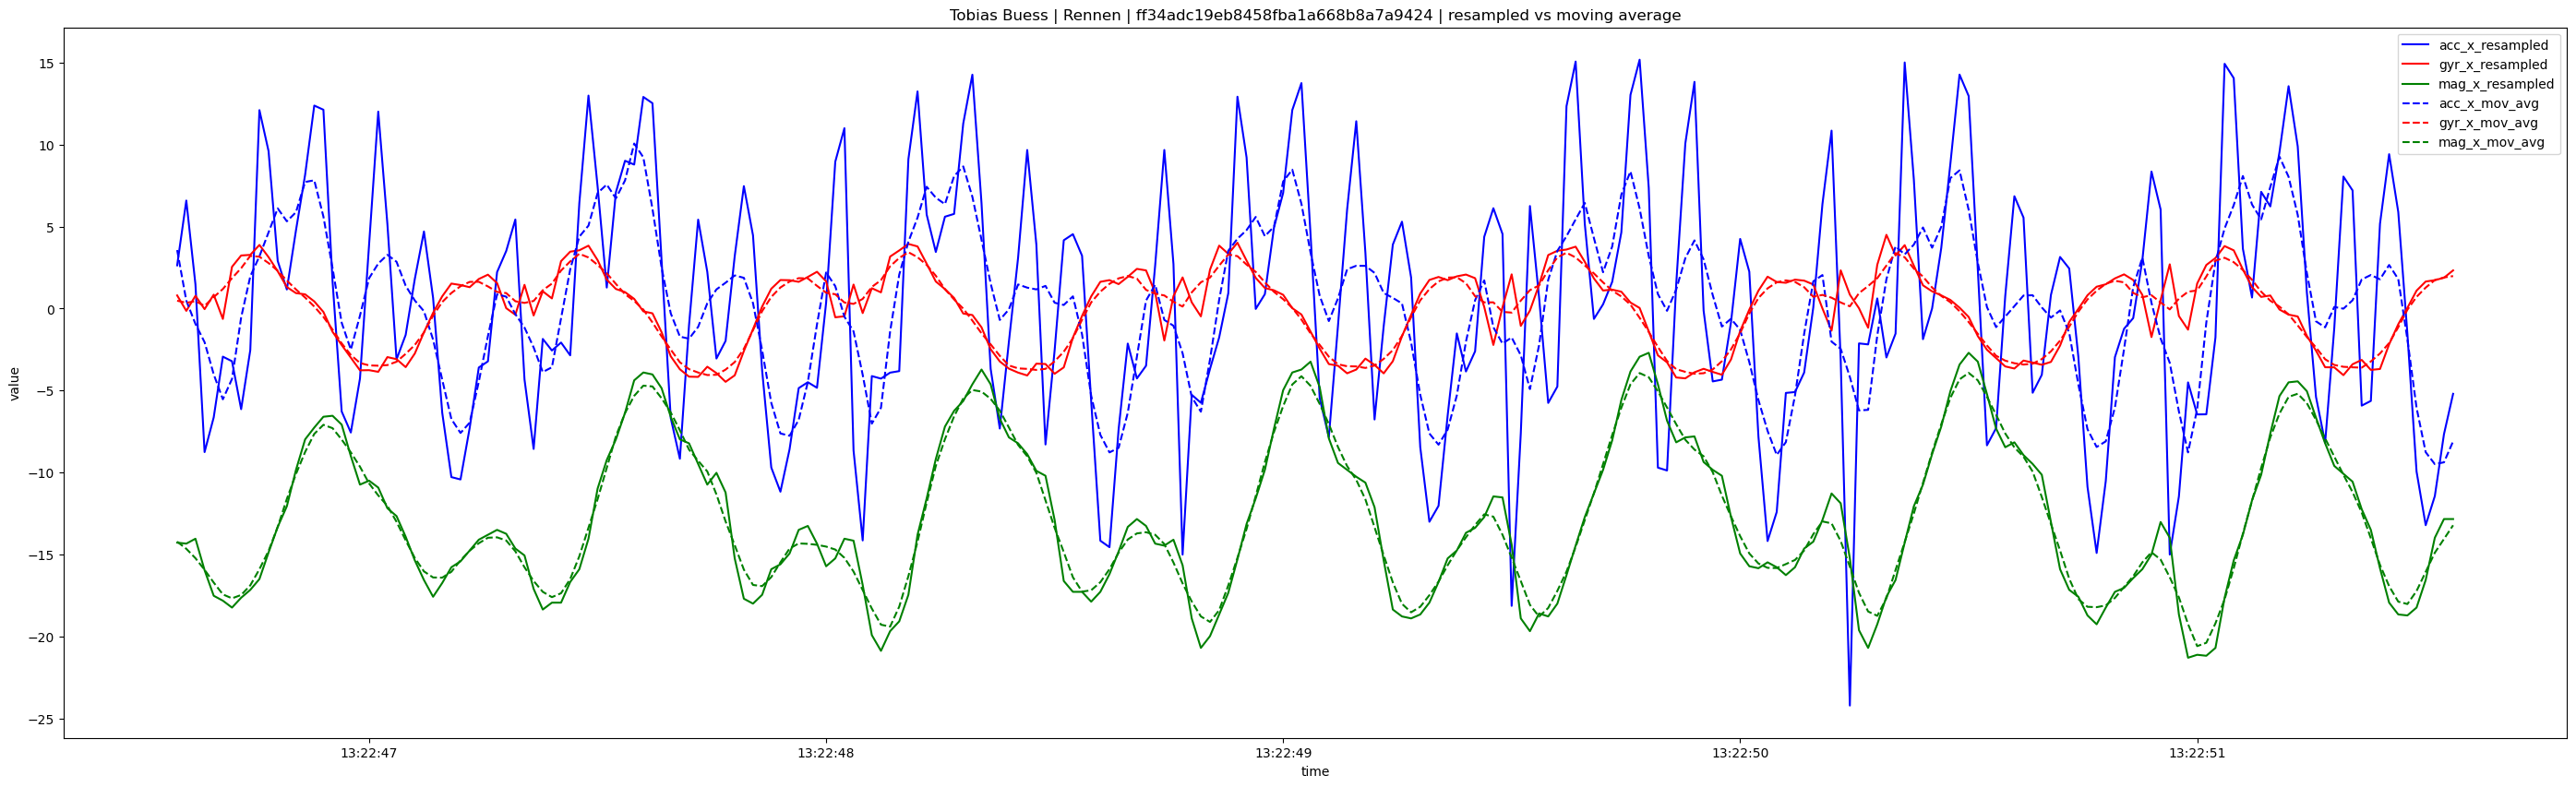

In [291]:
plt.figure(figsize=(35, 10))
plt.plot(first_segment.index.values, first_segment["Accelerometer_x"].values, label="acc_x_resampled", color="blue")
plt.plot(first_segment.index.values, first_segment["Gyroscope_x"].values, label="gyr_x_resampled", color="red")
plt.plot(first_segment.index.values, first_segment["Magnetometer_x"].values, label="mag_x_resampled", color="green")
plt.plot(first_segment_mov_average.index.values, first_segment_mov_average["Accelerometer_x"].values, '--', label="acc_x_mov_avg", color="blue")
plt.plot(first_segment_mov_average.index.values, first_segment_mov_average["Gyroscope_x"].values, '--', label="gyr_x_mov_avg", color="red")
plt.plot(first_segment_mov_average.index.values, first_segment_mov_average["Magnetometer_x"].values, '--', label="mag_x_mov_avg", color="green")
plt.xlabel("time")
plt.ylabel("value")
plt.title("Tobias Buess | Rennen | ff34adc19eb8458fba1a668b8a7a9424 | resampled vs moving average")
plt.legend()
plt.show()

Smooting hat funktioniert.

Keine Phasenverschiebung oder Offset zu erkennen.

# train test split

In [292]:
df_train_test_split = pd.read_json("data/train_test_split_ratio02.json", typ="series")

In [293]:
count_train_person = {}
count_test_person = {}
count_train_segments = 0
count_test_segments = 0
count_train_measurements = {}
count_test_measurements = {}

total_segments = 0

for (activity, person, hash_), segments in segments_5s.items():
    for segment in segments:
        total_segments += 1

        assert len(np.unique(segment["segment_id"])) == 1

        segment_id = segment["segment_id"].values[0]

        if segment_id in df_train_test_split["train"]:
            count_train_person[person] = count_train_person.get(person, 0) + 1
            count_train_segments += 1
            count_train_measurements[hash_] = count_train_measurements.get(hash_, 0) + 1

        elif segment_id in df_train_test_split["test"]:
            count_test_person[person] = count_test_person.get(person, 0) + 1
            count_test_segments += 1
            count_test_measurements[hash_] = count_test_measurements.get(hash_, 0) + 1

        else:
            raise Exception("unknown segment id")
        
print("percentage count_train_person: ", json.dumps({key:value/total_segments for key, value in count_train_person.items()}, sort_keys=True, indent=4))
print("percentage count_test_person: ", json.dumps({key:value/total_segments for key, value in count_test_person.items()}, sort_keys=True, indent=4))
print("\n")

print("percentage count_train_measurements: ", json.dumps({key:value/total_segments for key, value in count_train_measurements.items()}, sort_keys=True, indent=4))
print("percentage count_test_measurements: ", json.dumps({key:value/total_segments for key, value in count_test_measurements.items()}, sort_keys=True, indent=4))
print("\n")

print("percentage count_train_segments: ", count_train_segments/total_segments)
print("percentage count_test_segments: ", count_test_segments/total_segments)

percentage count_train_person:  {
    "Ben_Tran": 0.161198961529384,
    "Etienne_Roulet": 0.040004720320981825,
    "Florin_Barbisch": 0.08107151286287467,
    "Gabriel_Torres": 0.06820863818739674,
    "Lea_Buetler": 0.09334434741562427,
    "Manjavy_Kirupa": 0.0722209110219495,
    "Ognjen_Colovic": 0.05392966721737078,
    "Tobias_Buess": 0.054401699315553456,
    "Weiping_Zhang": 0.12048619306112816,
    "Yvo_Keller": 0.05510974746282747
}
percentage count_test_person:  {
    "Ben_Tran": 0.042010856738258204,
    "Etienne_Roulet": 0.008378569742742507,
    "Florin_Barbisch": 0.020415388246400754,
    "Gabriel_Torres": 0.01982534812367241,
    "Lea_Buetler": 0.020651404295492094,
    "Manjavy_Kirupa": 0.017701203681850367,
    "Ognjen_Colovic": 0.012980882700023602,
    "Tobias_Buess": 0.0145149870191173,
    "Weiping_Zhang": 0.027967901817323577,
    "Yvo_Keller": 0.015577059240028323
}


percentage count_train_measurements:  {
    "040d27bca3b84ad198a2aa1129e4c8ac": 0.00106207222

Segmentweiser Train-Test split konfiguriert.

Mit momentanen parametern von einem split von 0.8, 0.2 wird erwartet, dass **percentage count_train_segments**  sowie **percentage count_test_segments** ungefär diesen Werten entspricht.

Dies ist der Fall, weshalb angenommen werden kann, dass diese Konfiguration korrekt funktioniert.

# correlations

In [294]:
pd.read_parquet("data/correlations_pearson.parquet")

Accelerometer_x_corr_Accelerometer_y   
segment_id                                         
0                                       0.940449  \
1                                       0.929889   
2                                       0.928118   
3                                       0.936580   
4                                       0.943334   
...                                          ...   
8469                                   -0.167521   
8470                                   -0.073751   
8471                                    0.082571   
8472                                    0.070098   
8473                                   -0.658741   

            Accelerometer_x_corr_Accelerometer_z   
segment_id                                         
0                                      -0.911275  \
1                                      -0.909899   
2                                      -0.917964   
3                                      -0.911697   
4                                      -0.923044   
...                                          ...   
8469                                   -0.363598   
8470                                   -0.696608   
8471                                   -0.671341   
8472                                   -0.676111   
8473                                   -0.347964   

            Accelerometer_x_corr_Gyroscope_x   
segment_id                                     
0                                  -0.224074  \
1                                  -0.219648   
2                                  -0.240356   
3                                  -0.198936   
4                                  -0.187205   
...                                      ...   
8469                               -0.228691   
8470                               -0.108785   
8471                               -0.030016   
8472                               -0.062389   
8473                               -0.197220   

            Accelerometer_x_corr_Gyroscope_y   
segment_id                                     
0                                   0.159778  \
1                                   0.225673   
2                                   0.288667   
3                                   0.208537   
4                                   0.343488   
...                                      ...   
8469                                0.187963   
8470                                0.346415   
8471                                0.450380   
8472                                0.312101   
8473                                0.130222   

            Accelerometer_x_corr_Gyroscope_z   
segment_id                                     
0                                   0.148360  \
1                                   0.149983   
2                                   0.111447   
3                                   0.056597   
4                                   0.145348   
...                                      ...   
8469                                0.137564   
8470                                0.176603   
8471                                0.141729   
8472                                0.144816   
8473                                0.466947   

            Accelerometer_x_corr_Magnetometer_x   
segment_id                                        
0                                      0.669313  \
1                                      0.446571   
2                                      0.444960   
3                                      0.383389   
4                                      0.347921   
...                                         ...   
8469                                  -0.209385   
8470                                  -0.345007   
8471                                  -0.345121   
8472                                  -0.165113   
8473                                   0.012466   

            Accelerometer_x_corr_Magnetometer_y   
segment_id                                        
0                

In [295]:
print("last index must be:")
len(df_train_test_split["train"] + df_train_test_split["test"]) - 1

last index must be:


8473

Korrekte Anzahl Segmente auf Index.

# transform min max

In [296]:
with open("data/segments_min_max.dill", "rb") as fr:
    min_max_transformed = load(fr)

In [297]:
first_segment_min_max_transformed = min_max_transformed[id_key][0]

In [298]:
display(first_segment_min_max_transformed)
display(first_segment)

Accelerometer_x  Accelerometer_y  Accelerometer_z   
timestamp                                                                    
2023-03-12 13:22:46.580         0.650811         0.545992         0.391038  \
2023-03-12 13:22:46.600         0.679748         0.539653         0.385910   
2023-03-12 13:22:46.620         0.642326         0.550458         0.492068   
2023-03-12 13:22:46.640         0.567426         0.487195         0.320218   
2023-03-12 13:22:46.660         0.582935         0.443565         0.574644   
...                                  ...              ...              ...   
2023-03-12 13:22:51.480         0.558753         0.569136         0.475493   
2023-03-12 13:22:51.500         0.534774         0.597022         0.471284   
2023-03-12 13:22:51.520         0.547780         0.614839         0.471439   
2023-03-12 13:22:51.540         0.575431         0.618673         0.482631   
2023-03-12 13:22:51.560         0.593444         0.595434         0.479324   

                         Gyroscope_x  Gyroscope_y  Gyroscope_z   
timestamp                                                        
2023-03-12 13:22:46.580     0.470658     0.490974     0.554813  \
2023-03-12 13:22:46.600     0.437930     0.499977     0.528099   
2023-03-12 13:22:46.620     0.469757     0.573680     0.524209   
2023-03-12 13:22:46.640     0.441562     0.538657     0.533819   
2023-03-12 13:22:46.660     0.472213     0.452294     0.535097   
...                              ...          ...          ...   
2023-03-12 13:22:51.480     0.480774     0.422330     0.527013   
2023-03-12 13:22:51.500     0.500110     0.456379     0.559869   
2023-03-12 13:22:51.520     0.503016     0.502745     0.592617   
2023-03-12 13:22:51.540     0.508149     0.539585     0.613156   
2023-03-12 13:22:51.560     0.523797     0.547236     0.608652   

                         Magnetometer_x  Magnetometer_y  Magnetometer_z   
timestamp                                                                 
2023-03-12 13:22:46.580        0.584728        0.350608        0.650205  \
2023-03-12 13:22:46.600        0.584695        0.351371        0.649987   
2023-03-12 13:22:46.620        0.584858        0.351579        0.649791   
2023-03-12 13:22:46.640        0.583814        0.351925        0.649594   
2023-03-12 13:22:46.660        0.582965        0.351925        0.648984   
...                                 ...             ...             ...   
2023-03-12 13:22:51.480        0.582574        0.346794        0.651754   
2023-03-12 13:22:51.500        0.583488        0.346828        0.652103   
2023-03-12 13:22:51.520        0.584891        0.347591        0.652081   
2023-03-12 13:22:51.540        0.585511        0.347765        0.652016   
2023-03-12 13:22:51.560        0.585511        0.348423        0.651601   

                        activity                              hash   
timestamp                                                            
2023-03-12 13:22:46.580   Rennen  ff34adc19eb8458fba1a668b8a7a9424  \
2023-03-12 13:22:46.600   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
...                          ...                               ...   
2023-03-12 13:22:51.480   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.500   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.520   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.540   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.560   Rennen  ff34adc19eb8458fba1a668b8a7a9424   

                               person segment_id  
timestamp                                         
2023-03-12 13:22:46.580  Tobias_Buess       2688  
2023-03-12 13:22:46.600  Tobias_Buess       2688  
2023-03-12 13:22:46.620  Tobias_Buess       2688  
2023-03-1

Accelerometer_x  Accelerometer_y  Accelerometer_z   
timestamp                                                                    
2023-03-12 13:22:46.580         2.634803         2.672371        -4.872926  \
2023-03-12 13:22:46.600         6.587286         1.461584        -5.670835   
2023-03-12 13:22:46.620         1.475835         3.525508        10.847507   
2023-03-12 13:22:46.640        -8.754858        -8.557976       -15.892511   
2023-03-12 13:22:46.660        -6.636459       -16.891476        23.696314   
...                                  ...              ...              ...   
2023-03-12 13:22:51.480        -9.939420         7.093018         8.268422   
2023-03-12 13:22:51.500       -13.214779        12.419365         7.613528   
2023-03-12 13:22:51.520       -11.438312        15.822448         7.637514   
2023-03-12 13:22:51.540        -7.661373        16.554707         9.379020   
2023-03-12 13:22:51.560        -5.200958        12.116073         8.864466   

                         Gyroscope_x  Gyroscope_y  Gyroscope_z   
timestamp                                                        
2023-03-12 13:22:46.580     0.800631     0.082314     0.226494  \
2023-03-12 13:22:46.600    -0.140468     0.470947    -0.708130   
2023-03-12 13:22:46.620     0.774730     3.652333    -0.844231   
2023-03-12 13:22:46.640    -0.036011     2.140563    -0.508011   
2023-03-12 13:22:46.660     0.845346    -1.587303    -0.463296   
...                              ...          ...          ...   
2023-03-12 13:22:51.480     1.091524    -2.880749    -0.746126   
2023-03-12 13:22:51.500     1.647534    -1.411007     0.403400   
2023-03-12 13:22:51.520     1.731100     0.590432     1.549139   
2023-03-12 13:22:51.540     1.878686     2.180636     2.267761   
2023-03-12 13:22:51.560     2.328649     2.510870     2.110158   

                         Magnetometer_x  Magnetometer_y  Magnetometer_z   
timestamp                                                                 
2023-03-12 13:22:46.580      -14.280000       31.320000       25.680000  \
2023-03-12 13:22:46.600      -14.340000       32.639999       25.080000   
2023-03-12 13:22:46.620      -14.040000       33.000000       24.539999   
2023-03-12 13:22:46.640      -15.960000       33.599998       24.000000   
2023-03-12 13:22:46.660      -17.520000       33.599998       22.320000   
...                                 ...             ...             ...   
2023-03-12 13:22:51.480      -18.240000       24.719999       29.939999   
2023-03-12 13:22:51.500      -16.559999       24.779999       30.900000   
2023-03-12 13:22:51.520      -13.980000       26.099998       30.840000   
2023-03-12 13:22:51.540      -12.840000       26.400000       30.660000   
2023-03-12 13:22:51.560      -12.840000       27.539999       29.519999   

                        activity                              hash   
timestamp                                                            
2023-03-12 13:22:46.580   Rennen  ff34adc19eb8458fba1a668b8a7a9424  \
2023-03-12 13:22:46.600   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
...                          ...                               ...   
2023-03-12 13:22:51.480   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.500   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.520   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.540   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.560   Rennen  ff34adc19eb8458fba1a668b8a7a9424   

                               person segment_id  
timestamp                                         
2023-03-12 13:22:46.580  Tobias_Buess       2688  
2023-03-12 13:22:46.600  Tobias_Buess       2688  
2023-03-12 13:22:46.620  Tobias_Buess       2688  
2023-03-1

Korrekte Struktur.

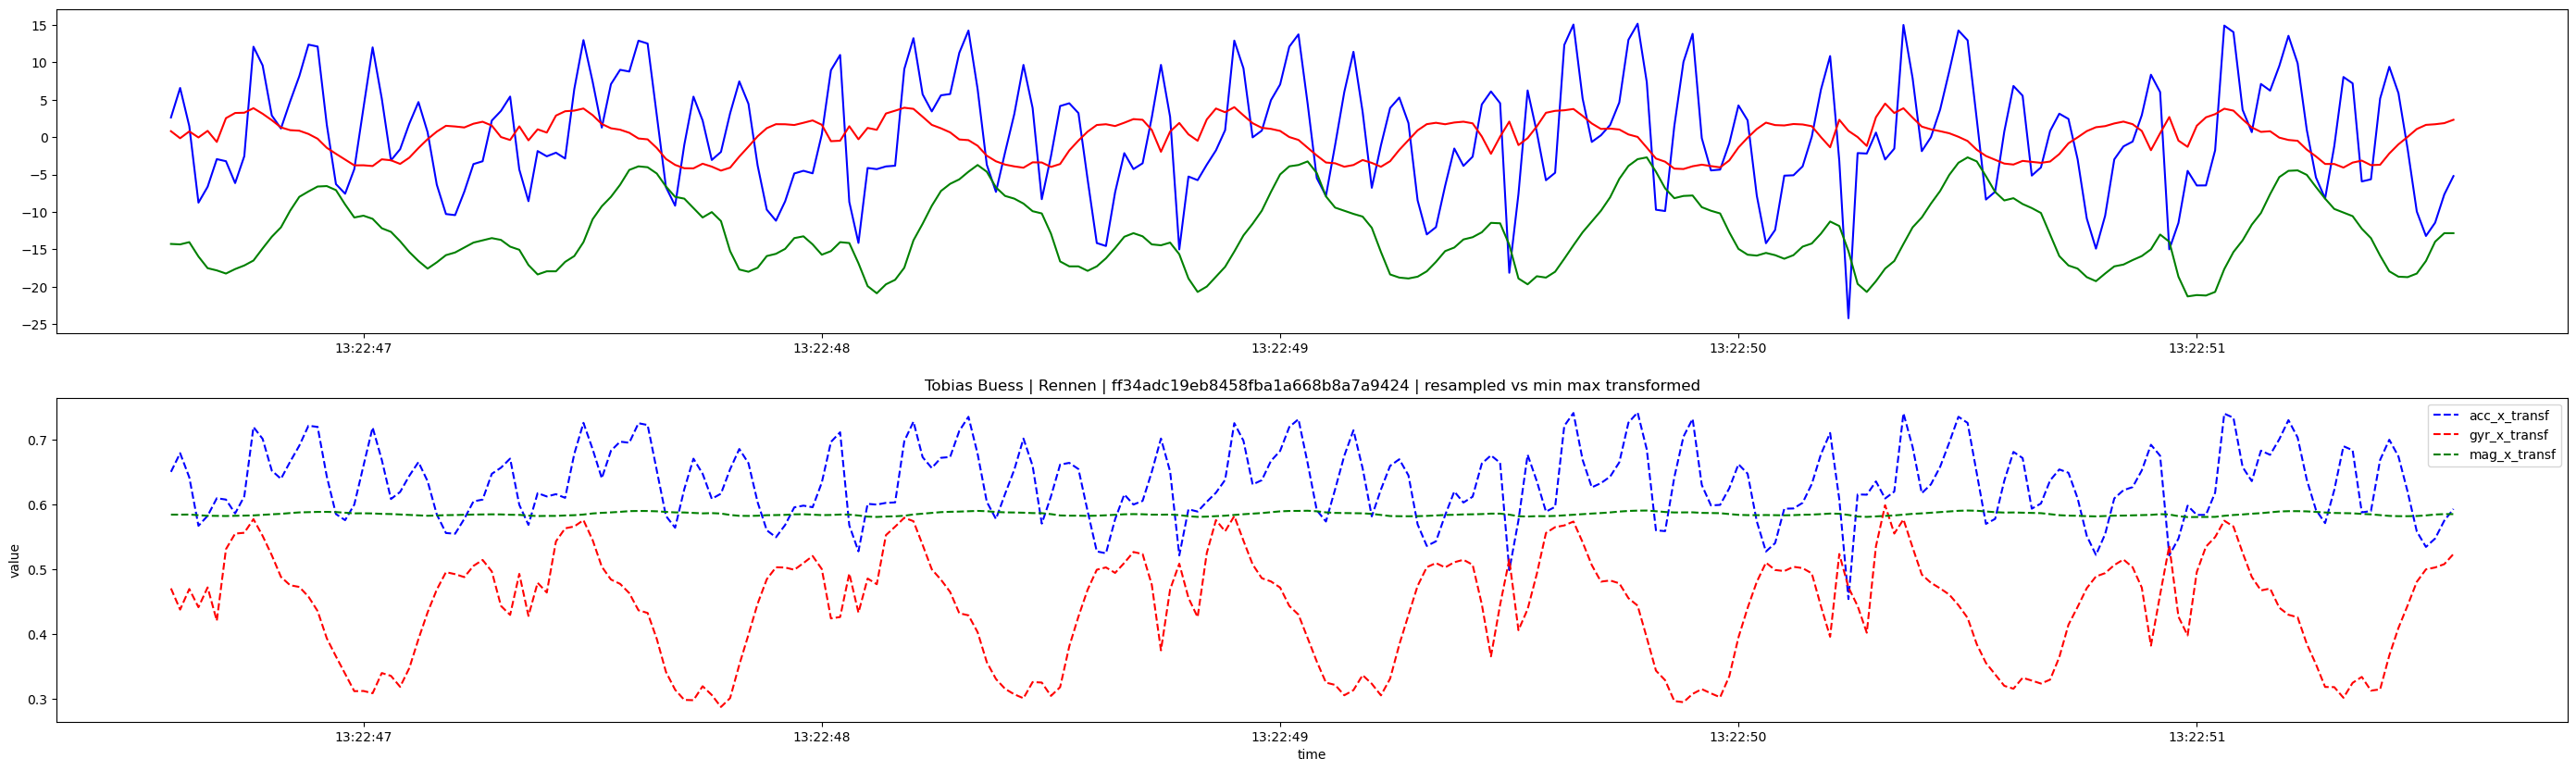

In [299]:
_, ax = plt.subplots(2, 1, figsize=(35, 10))
ax[0].plot(first_segment.index.values, first_segment["Accelerometer_x"].values, label="acc_x_resampled", color="blue")
ax[0].plot(first_segment.index.values, first_segment["Gyroscope_x"].values, label="gyr_x_resampled", color="red")
ax[0].plot(first_segment.index.values, first_segment["Magnetometer_x"].values, label="mag_x_resampled", color="green")
ax[1].plot(first_segment_min_max_transformed.index.values, first_segment_min_max_transformed["Accelerometer_x"].values, '--', label="acc_x_transf", color="blue")
ax[1].plot(first_segment_min_max_transformed.index.values, first_segment_min_max_transformed["Gyroscope_x"].values, '--', label="gyr_x_transf", color="red")
ax[1].plot(first_segment_min_max_transformed.index.values, first_segment_min_max_transformed["Magnetometer_x"].values, '--', label="mag_x_transf", color="green")
plt.xlabel("time")
plt.ylabel("value")
plt.title("Tobias Buess | Rennen | ff34adc19eb8458fba1a668b8a7a9424 | resampled vs min max transformed")
plt.legend()
plt.show()

Proportion des transformierten Signals ist korrekt.

In [300]:
segments_train = []
segments_test = []

for (activity, person, hash_), segments in min_max_transformed.items():
    for segment in segments:
        assert len(np.unique(segment["segment_id"])) == 1

        segment_id = segment["segment_id"].values[0]

        if segment_id in df_train_test_split["train"]:
            segments_train.append(segment)

        elif segment_id in df_train_test_split["test"]:
            segments_test.append(segment)

        else:
            raise Exception("unknown segment id")

print("description of train split")       
display(pd.concat(segments_train, axis=0, ignore_index=False).describe())
print("description of test split")   
display(pd.concat(segments_test, axis=0, ignore_index=False).describe())

description of train split


Accelerometer_x  Accelerometer_y  Accelerometer_z   Gyroscope_x   
count     1.694750e+06     1.694750e+06     1.694750e+06  1.694750e+06  \
mean      6.300624e-01     5.381457e-01     4.222916e-01  4.429334e-01   
std       3.452489e-02     3.105796e-02     2.814075e-02  4.466106e-02   
min       0.000000e+00     0.000000e+00     0.000000e+00  0.000000e+00   
25%       6.210073e-01     5.310072e-01     4.146655e-01  4.337949e-01   
50%       6.314328e-01     5.321298e-01     4.222793e-01  4.428182e-01   
75%       6.399397e-01     5.469636e-01     4.290181e-01  4.545637e-01   
max       1.000000e+00     1.000000e+00     1.000000e+00  1.000000e+00   

        Gyroscope_y   Gyroscope_z  Magnetometer_x  Magnetometer_y   
count  1.694750e+06  1.694750e+06    1.694750e+06    1.694750e+06  \
mean   4.891022e-01  5.481302e-01    5.873378e-01    3.423738e-01   
std    3.405887e-02  3.153288e-02    1.581133e-02    2.415469e-02   
min    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
25%    4.830180e-01  5.406178e-01    5.766972e-01    3.354209e-01   
50%    4.890636e-01  5.483348e-01    5.854843e-01    3.480204e-01   
75%    4.945430e-01  5.547630e-01    5.975848e-01    3.552416e-01   
max    1.000000e+00  1.000000e+00    1.000000e+00    1.000000e+00   

       Magnetometer_z  
count    1.694750e+06  
mean     6.438377e-01  
std      1.213815e-02  
min      0.000000e+00  
25%      6.376662e-01  
50%      6.447778e-01  
75%      6.500989e-01  
max      1.000000e+00

description of test split


Accelerometer_x  Accelerometer_y  Accelerometer_z    Gyroscope_x   
count    423750.000000    423750.000000    423750.000000  423750.000000  \
mean          0.630390         0.538574         0.422398       0.442963   
std           0.035367         0.030117         0.028039       0.045239   
min           0.062907        -0.071723        -0.034602       0.094320   
25%           0.621088         0.531366         0.414806       0.433960   
50%           0.631440         0.532189         0.422294       0.442819   
75%           0.640190         0.547794         0.428974       0.455153   
max           1.000992         0.877329         0.996846       0.972097   

         Gyroscope_y    Gyroscope_z  Magnetometer_x  Magnetometer_y   
count  423750.000000  423750.000000   423750.000000   423750.000000  \
mean        0.488974       0.548165        0.587344        0.341822   
std         0.033469       0.030903        0.014430        0.025045   
min         0.067632      -0.051978        0.516905        0.001184   
25%         0.483002       0.540744        0.576755        0.335109   
50%         0.489060       0.548335        0.585703        0.347829   
75%         0.494195       0.554503        0.597391        0.355155   
max         0.930305       0.979022        0.769487        0.399146   

       Magnetometer_z  
count   423750.000000  
mean         0.643910  
std          0.009587  
min          0.561955  
25%          0.637748  
50%          0.644938  
75%          0.650197  
max          0.707668

Es wird nach der Transformation beim Train für jede Spalte ein min von 0 und max von 1 erwartet.

Dies ist auch der Fall.

# standardization

In [301]:
with open("data/segments_standardized.dill", "rb") as fr:
    standardized_transformed = load(fr)

In [302]:
first_segment_standardized_transformed = standardized_transformed[id_key][0]

In [303]:
display(first_segment_standardized_transformed)
display(first_segment)

Accelerometer_x  Accelerometer_y  Accelerometer_z   
timestamp                                                                    
2023-03-12 13:22:46.580         0.601579         0.254963        -1.125557  \
2023-03-12 13:22:46.600         1.440556         0.048971        -1.310231   
2023-03-12 13:22:46.620         0.355569         0.400108         2.512896   
2023-03-12 13:22:46.640        -1.816059        -1.655666        -3.676011   
2023-03-12 13:22:46.660        -1.366395        -3.073452         5.486719   
...                                  ...              ...              ...   
2023-03-12 13:22:51.480        -2.067501         1.007052         1.915974   
2023-03-12 13:22:51.500        -2.762748         1.913228         1.764400   
2023-03-12 13:22:51.520        -2.385665         2.492198         1.769952   
2023-03-12 13:22:51.540        -1.583949         2.616778         2.173018   
2023-03-12 13:22:51.560        -1.061687         1.861629         2.053926   

                         Gyroscope_x  Gyroscope_y  Gyroscope_z   
timestamp                                                        
2023-03-12 13:22:46.580     0.620822     0.055405     0.214537  \
2023-03-12 13:22:46.600    -0.112044     0.321886    -0.643060   
2023-03-12 13:22:46.620     0.600653     2.503331    -0.767944   
2023-03-12 13:22:46.640    -0.030699     1.466726    -0.459433   
2023-03-12 13:22:46.660     0.655644    -1.089435    -0.418403   
...                              ...          ...          ...   
2023-03-12 13:22:51.480     0.847351    -1.976338    -0.677924   
2023-03-12 13:22:51.500     1.280335    -0.968550     0.376864   
2023-03-12 13:22:51.520     1.345411     0.403816     1.428176   
2023-03-12 13:22:51.540     1.460340     1.494203     2.087572   
2023-03-12 13:22:51.560     1.810742     1.720642     1.942958   

                         Magnetometer_x  Magnetometer_y  Magnetometer_z   
timestamp                                                                 
2023-03-12 13:22:46.580       -0.168226        0.340814        0.649736  \
2023-03-12 13:22:46.600       -0.170329        0.372388        0.627480   
2023-03-12 13:22:46.620       -0.159811        0.380999        0.607449   
2023-03-12 13:22:46.640       -0.227131        0.395351        0.587418   
2023-03-12 13:22:46.660       -0.281830        0.395351        0.525099   
...                                 ...             ...             ...   
2023-03-12 13:22:51.480       -0.307075        0.182945        0.807758   
2023-03-12 13:22:51.500       -0.248169        0.184380        0.843369   
2023-03-12 13:22:51.520       -0.157707        0.215954        0.841143   
2023-03-12 13:22:51.540       -0.117735        0.223130        0.834466   
2023-03-12 13:22:51.560       -0.117735        0.250398        0.792179   

                        activity                              hash   
timestamp                                                            
2023-03-12 13:22:46.580   Rennen  ff34adc19eb8458fba1a668b8a7a9424  \
2023-03-12 13:22:46.600   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
...                          ...                               ...   
2023-03-12 13:22:51.480   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.500   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.520   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.540   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.560   Rennen  ff34adc19eb8458fba1a668b8a7a9424   

                               person segment_id  
timestamp                                         
2023-03-12 13:22:46.580  Tobias_Buess       2688  
2023-03-12 13:22:46.600  Tobias_Buess       2688  
2023-03-12 13:22:46.620  Tobias_Buess       2688  
2023-03-1

Accelerometer_x  Accelerometer_y  Accelerometer_z   
timestamp                                                                    
2023-03-12 13:22:46.580         2.634803         2.672371        -4.872926  \
2023-03-12 13:22:46.600         6.587286         1.461584        -5.670835   
2023-03-12 13:22:46.620         1.475835         3.525508        10.847507   
2023-03-12 13:22:46.640        -8.754858        -8.557976       -15.892511   
2023-03-12 13:22:46.660        -6.636459       -16.891476        23.696314   
...                                  ...              ...              ...   
2023-03-12 13:22:51.480        -9.939420         7.093018         8.268422   
2023-03-12 13:22:51.500       -13.214779        12.419365         7.613528   
2023-03-12 13:22:51.520       -11.438312        15.822448         7.637514   
2023-03-12 13:22:51.540        -7.661373        16.554707         9.379020   
2023-03-12 13:22:51.560        -5.200958        12.116073         8.864466   

                         Gyroscope_x  Gyroscope_y  Gyroscope_z   
timestamp                                                        
2023-03-12 13:22:46.580     0.800631     0.082314     0.226494  \
2023-03-12 13:22:46.600    -0.140468     0.470947    -0.708130   
2023-03-12 13:22:46.620     0.774730     3.652333    -0.844231   
2023-03-12 13:22:46.640    -0.036011     2.140563    -0.508011   
2023-03-12 13:22:46.660     0.845346    -1.587303    -0.463296   
...                              ...          ...          ...   
2023-03-12 13:22:51.480     1.091524    -2.880749    -0.746126   
2023-03-12 13:22:51.500     1.647534    -1.411007     0.403400   
2023-03-12 13:22:51.520     1.731100     0.590432     1.549139   
2023-03-12 13:22:51.540     1.878686     2.180636     2.267761   
2023-03-12 13:22:51.560     2.328649     2.510870     2.110158   

                         Magnetometer_x  Magnetometer_y  Magnetometer_z   
timestamp                                                                 
2023-03-12 13:22:46.580      -14.280000       31.320000       25.680000  \
2023-03-12 13:22:46.600      -14.340000       32.639999       25.080000   
2023-03-12 13:22:46.620      -14.040000       33.000000       24.539999   
2023-03-12 13:22:46.640      -15.960000       33.599998       24.000000   
2023-03-12 13:22:46.660      -17.520000       33.599998       22.320000   
...                                 ...             ...             ...   
2023-03-12 13:22:51.480      -18.240000       24.719999       29.939999   
2023-03-12 13:22:51.500      -16.559999       24.779999       30.900000   
2023-03-12 13:22:51.520      -13.980000       26.099998       30.840000   
2023-03-12 13:22:51.540      -12.840000       26.400000       30.660000   
2023-03-12 13:22:51.560      -12.840000       27.539999       29.519999   

                        activity                              hash   
timestamp                                                            
2023-03-12 13:22:46.580   Rennen  ff34adc19eb8458fba1a668b8a7a9424  \
2023-03-12 13:22:46.600   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
...                          ...                               ...   
2023-03-12 13:22:51.480   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.500   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.520   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.540   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.560   Rennen  ff34adc19eb8458fba1a668b8a7a9424   

                               person segment_id  
timestamp                                         
2023-03-12 13:22:46.580  Tobias_Buess       2688  
2023-03-12 13:22:46.600  Tobias_Buess       2688  
2023-03-12 13:22:46.620  Tobias_Buess       2688  
2023-03-1

Korrekte Struktur.

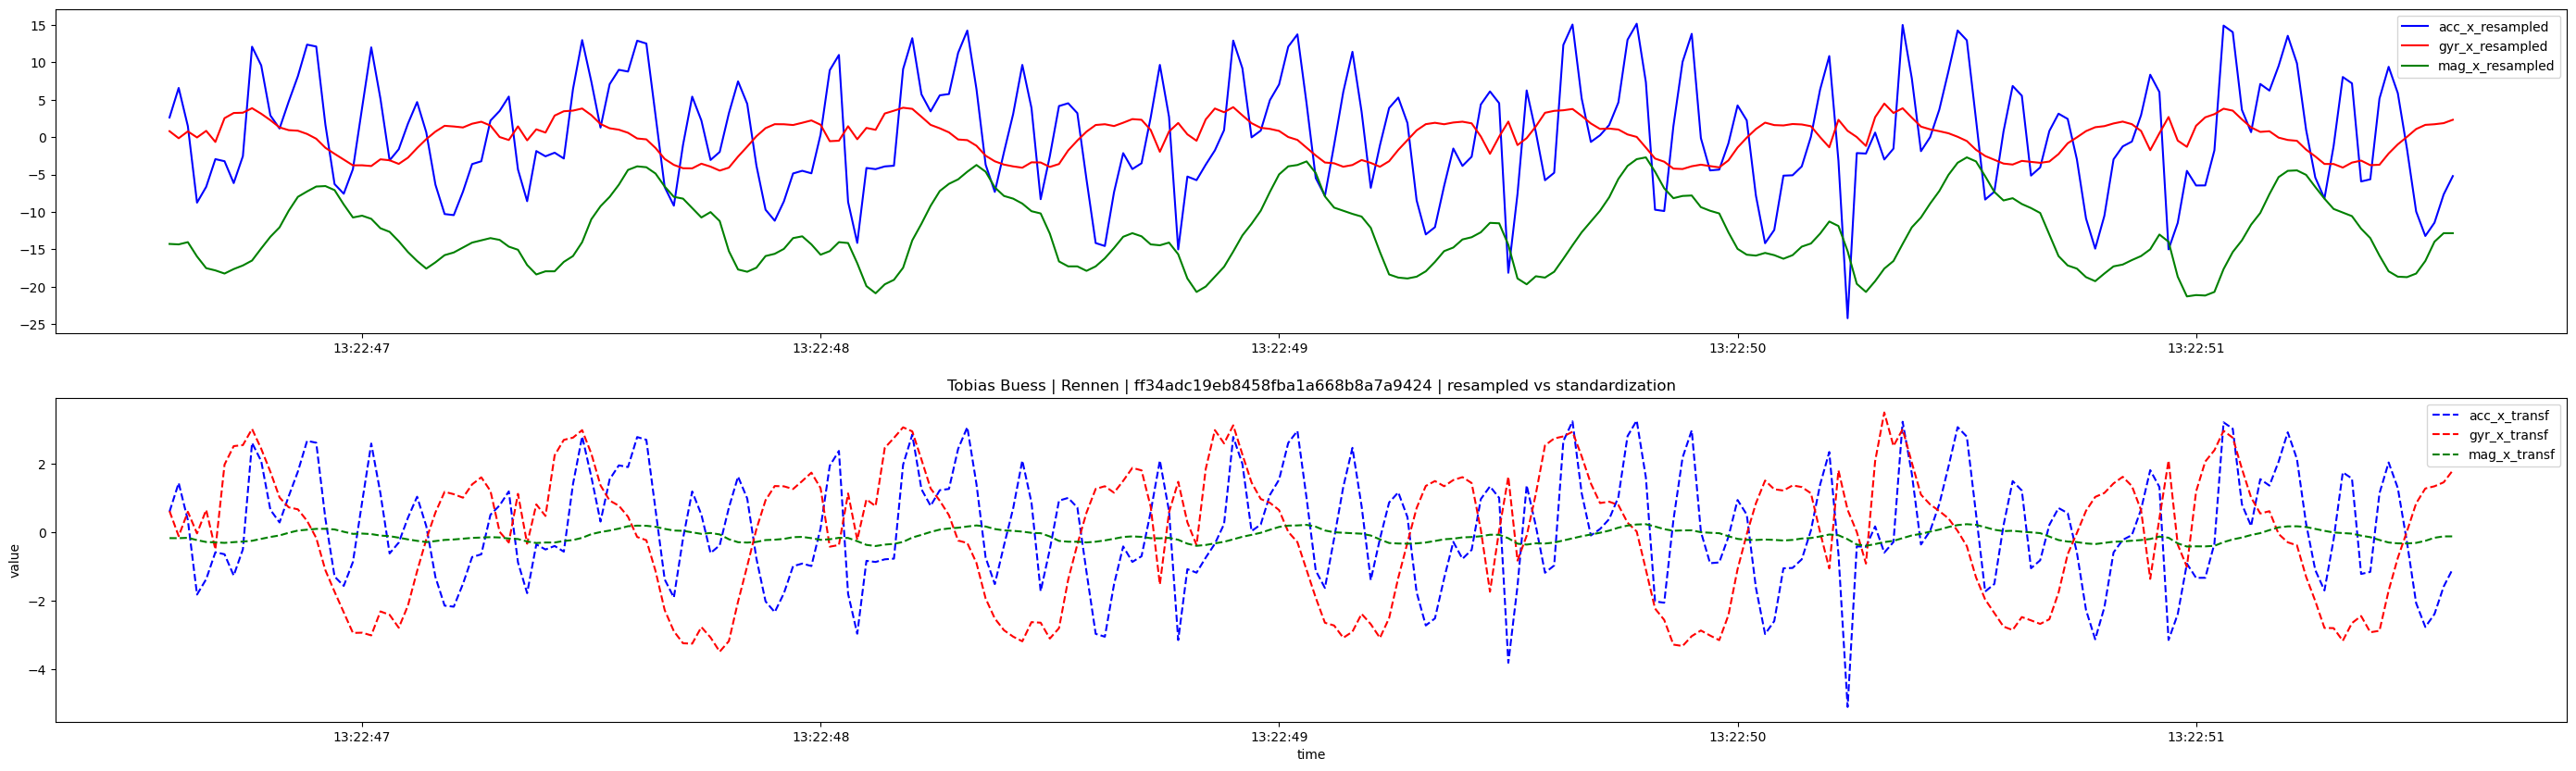

In [304]:
_, ax = plt.subplots(2, 1, figsize=(35, 10))
ax[0].plot(first_segment.index.values, first_segment["Accelerometer_x"].values, label="acc_x_resampled", color="blue")
ax[0].plot(first_segment.index.values, first_segment["Gyroscope_x"].values, label="gyr_x_resampled", color="red")
ax[0].plot(first_segment.index.values, first_segment["Magnetometer_x"].values, label="mag_x_resampled", color="green")
ax[0].legend()
ax[1].plot(first_segment_standardized_transformed.index.values, first_segment_standardized_transformed["Accelerometer_x"].values, '--', label="acc_x_transf", color="blue")
ax[1].plot(first_segment_standardized_transformed.index.values, first_segment_standardized_transformed["Gyroscope_x"].values, '--', label="gyr_x_transf", color="red")
ax[1].plot(first_segment_standardized_transformed.index.values, first_segment_standardized_transformed["Magnetometer_x"].values, '--', label="mag_x_transf", color="green")
ax[1].legend()
plt.xlabel("time")
plt.ylabel("value")
plt.title("Tobias Buess | Rennen | ff34adc19eb8458fba1a668b8a7a9424 | resampled vs standardization")
plt.show()

Features werden sklariert (alle Signale sind nun etwa gleich hoch).

In [305]:
segments_train = []
segments_test = []

for (activity, person, hash_), segments in standardized_transformed.items():
    for segment in segments:
        assert len(np.unique(segment["segment_id"])) == 1

        segment_id = segment["segment_id"].values[0]

        if segment_id in df_train_test_split["train"]:
            segments_train.append(segment)

        elif segment_id in df_train_test_split["test"]:
            segments_test.append(segment)

        else:
            raise Exception("unknown segment id")

print("description of train split")       
display(pd.concat(segments_train, axis=0, ignore_index=False).describe())
print("description of test split")   
display(pd.concat(segments_test, axis=0, ignore_index=False).describe())

description of train split


Accelerometer_x  Accelerometer_y  Accelerometer_z   Gyroscope_x   
count     1.694750e+06     1.694750e+06     1.694750e+06  1.694750e+06  \
mean      4.744878e-09     1.048015e-08     1.787207e-09  7.346908e-09   
std       9.989831e-01     9.934091e-01     9.988740e-01  9.993523e-01   
min      -1.826767e+01    -1.748740e+01    -1.520816e+01 -9.918424e+00   
25%      -2.625398e-01    -2.319741e-01    -2.746414e-01 -2.046308e-01   
50%       3.972934e-02    -1.954948e-01    -4.422455e-04 -2.575800e-03   
75%       2.863741e-01     2.865400e-01     2.422426e-01  2.604382e-01   
max       1.072576e+01     1.500826e+01     2.080525e+01  1.247417e+01   

        Gyroscope_y   Gyroscope_z  Magnetometer_x  Magnetometer_y   
count  1.694750e+06  1.694750e+06    1.694750e+06    1.694750e+06  \
mean   6.752673e-11  6.617619e-09    5.416544e-08    3.255689e-08   
std    9.990714e-01  9.994076e-01    9.989827e-01    9.988261e-01   
min   -1.447646e+01 -1.759699e+01   -3.785960e+01   -1.417134e+01   
25%   -1.800791e-01 -2.411753e-01   -6.858860e-01   -2.877919e-01   
50%   -1.140410e-03  6.569803e-03   -1.194702e-01    2.337180e-01   
75%    1.610397e-01  2.129375e-01    6.605306e-01    5.326120e-01   
max    1.512157e+01  1.450668e+01    2.660009e+01    2.722008e+01   

       Magnetometer_z  
count    1.694750e+06  
mean    -6.165640e-08  
std      9.994702e-01  
min     -6.569701e+01  
25%     -6.297418e-01  
50%      9.592964e-02  
75%      6.388863e-01  
max      3.634270e+01

description of test split


Accelerometer_x  Accelerometer_y  Accelerometer_z    Gyroscope_x   
count    423750.000000    423750.000000    423750.000000  423750.000000  \
mean          0.009505         0.013910         0.003851       0.000659   
std           1.025298         0.979426         1.009829       1.012957   
min         -16.443792       -19.818090       -16.454302      -7.806350   
25%          -0.260194        -0.220309        -0.269572      -0.200928   
50%           0.039932        -0.193575         0.000077      -0.002549   
75%           0.293623         0.313526         0.240660       0.273639   
max          10.754515        11.021982        20.691648      11.849358   

         Gyroscope_y    Gyroscope_z  Magnetometer_x  Magnetometer_y   
count  423750.000000  423750.000000   423750.000000   423750.000000  \
mean       -0.003782       0.001118        0.000433       -0.022859   
std         0.990531       0.992048        0.930041        1.036795   
min       -12.474690     -19.265690       -4.540041      -14.122344   
25%        -0.180551      -0.237111       -0.682161       -0.300708   
50%        -0.001246       0.006563       -0.105375        0.225775   
75%         0.150737       0.204592        0.648039        0.529028   
max        13.058741      13.833198       11.741316        2.349877   

       Magnetometer_z  
count   423750.000000  
mean         0.007361  
std          0.978213  
min         -8.355287  
25%         -0.621396  
50%          0.112280  
75%          0.648943  
max          6.513197

Wie auch schon beim Min-Max scaler wird pro Spalte transformiert.

Es wird beim Train eine Standardabweichung von ungefär 1 und ein Mean von 0 erwartet, was auch der Fall ist.

# pca

In [306]:
with open("data/segments_pca.dill", "rb") as fr:
    pca_transformed = load(fr)

with open("data/transformer_pca.dill", "rb") as fr:
    pca_transformer:Transformer_PCA = load(fr)

In [307]:
first_segment_pca_transformed = pca_transformed[id_key][0]

In [308]:
display(first_segment_pca_transformed)
display(first_segment)

activity                              hash   
timestamp                                                            
2023-03-12 13:22:46.580   Rennen  ff34adc19eb8458fba1a668b8a7a9424  \
2023-03-12 13:22:46.600   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
...                          ...                               ...   
2023-03-12 13:22:51.480   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.500   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.520   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.540   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.560   Rennen  ff34adc19eb8458fba1a668b8a7a9424   

                               person segment_id        c_0        c_1   
timestamp                                                                
2023-03-12 13:22:46.580  Tobias_Buess       2688  13.022344 -12.439830  \
2023-03-12 13:22:46.600  Tobias_Buess       2688  14.382009 -12.053661   
2023-03-12 13:22:46.620  Tobias_Buess       2688  14.787570 -11.894100   
2023-03-12 13:22:46.640  Tobias_Buess       2688  15.382886 -13.379898   
2023-03-12 13:22:46.660  Tobias_Buess       2688  15.557113 -14.576694   
...                               ...        ...        ...        ...   
2023-03-12 13:22:51.480  Tobias_Buess       2688   6.416721 -18.629938   
2023-03-12 13:22:51.500  Tobias_Buess       2688   6.334237 -17.655373   
2023-03-12 13:22:51.520  Tobias_Buess       2688   7.513633 -15.256689   
2023-03-12 13:22:51.540  Tobias_Buess       2688   7.763489 -14.073177   
2023-03-12 13:22:51.560  Tobias_Buess       2688   8.943343 -13.474097   

                               c_2        c_3        c_4        c_5       c_6   
timestamp                                                                       
2023-03-12 13:22:46.580 -14.198339  -0.416641  -5.977495   2.284098  0.038699  \
2023-03-12 13:22:46.600 -13.773558   1.600403  -9.230309   0.648300  0.159538   
2023-03-12 13:22:46.620 -13.741467  -3.025665   3.911079  -9.628136  3.767379   
2023-03-12 13:22:46.640 -12.111465   9.507104  -1.039497  18.280542  1.482619   
2023-03-12 13:22:46.660 -10.480508  14.066701  22.106493 -14.745067 -0.980917   
...                            ...        ...        ...        ...       ...   
2023-03-12 13:22:51.480 -15.404231  -8.595007  10.368381  -1.147107 -2.677940   
2023-03-12 13:22:51.500 -17.049641 -14.329113  11.392379   1.195254 -0.992567   
2023-03-12 13:22:51.520 -18.396660 -17.267479   9.321920   0.090683  1.209768   
2023-03-12 13:22:51.540 -18.844339 -17.414415   7.222270  -3.516487  2.976918   
2023-03-12 13:22:51.560 -17.990154 -12.535815   5.964274  -4.397277  3.277363   

                              c_7       c_8  
timestamp                                    
2023-03-12 13:22:46.580 -0.627625  0.142343  
2023-03-12 13:22:46.600  0.792117  0.597760  
2023-03-12 13:22:46.620  0.136254  1.777529  
2023-03-12 13:22:46.640  0.739421  0.426246  
2023-03-12 13:22:46.660 -1.134027  0.900117  
...                           ...       ...  
2023-03-12 13:22:51.480 -1.389603  0.720902  
2023-03-12 13:22:51.500 -2.283070  0.131664  
2023-03-12 13:22:51.520 -2.568280 -0.526842  
2023-03-12 13:22:51.540 -2.738617 -0.783951  
2023-03-12 13:22:51.560 -2.919802 -0.344997  

[250 rows x 13 columns]

Accelerometer_x  Accelerometer_y  Accelerometer_z   
timestamp                                                                    
2023-03-12 13:22:46.580         2.634803         2.672371        -4.872926  \
2023-03-12 13:22:46.600         6.587286         1.461584        -5.670835   
2023-03-12 13:22:46.620         1.475835         3.525508        10.847507   
2023-03-12 13:22:46.640        -8.754858        -8.557976       -15.892511   
2023-03-12 13:22:46.660        -6.636459       -16.891476        23.696314   
...                                  ...              ...              ...   
2023-03-12 13:22:51.480        -9.939420         7.093018         8.268422   
2023-03-12 13:22:51.500       -13.214779        12.419365         7.613528   
2023-03-12 13:22:51.520       -11.438312        15.822448         7.637514   
2023-03-12 13:22:51.540        -7.661373        16.554707         9.379020   
2023-03-12 13:22:51.560        -5.200958        12.116073         8.864466   

                         Gyroscope_x  Gyroscope_y  Gyroscope_z   
timestamp                                                        
2023-03-12 13:22:46.580     0.800631     0.082314     0.226494  \
2023-03-12 13:22:46.600    -0.140468     0.470947    -0.708130   
2023-03-12 13:22:46.620     0.774730     3.652333    -0.844231   
2023-03-12 13:22:46.640    -0.036011     2.140563    -0.508011   
2023-03-12 13:22:46.660     0.845346    -1.587303    -0.463296   
...                              ...          ...          ...   
2023-03-12 13:22:51.480     1.091524    -2.880749    -0.746126   
2023-03-12 13:22:51.500     1.647534    -1.411007     0.403400   
2023-03-12 13:22:51.520     1.731100     0.590432     1.549139   
2023-03-12 13:22:51.540     1.878686     2.180636     2.267761   
2023-03-12 13:22:51.560     2.328649     2.510870     2.110158   

                         Magnetometer_x  Magnetometer_y  Magnetometer_z   
timestamp                                                                 
2023-03-12 13:22:46.580      -14.280000       31.320000       25.680000  \
2023-03-12 13:22:46.600      -14.340000       32.639999       25.080000   
2023-03-12 13:22:46.620      -14.040000       33.000000       24.539999   
2023-03-12 13:22:46.640      -15.960000       33.599998       24.000000   
2023-03-12 13:22:46.660      -17.520000       33.599998       22.320000   
...                                 ...             ...             ...   
2023-03-12 13:22:51.480      -18.240000       24.719999       29.939999   
2023-03-12 13:22:51.500      -16.559999       24.779999       30.900000   
2023-03-12 13:22:51.520      -13.980000       26.099998       30.840000   
2023-03-12 13:22:51.540      -12.840000       26.400000       30.660000   
2023-03-12 13:22:51.560      -12.840000       27.539999       29.519999   

                        activity                              hash   
timestamp                                                            
2023-03-12 13:22:46.580   Rennen  ff34adc19eb8458fba1a668b8a7a9424  \
2023-03-12 13:22:46.600   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
...                          ...                               ...   
2023-03-12 13:22:51.480   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.500   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.520   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.540   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.560   Rennen  ff34adc19eb8458fba1a668b8a7a9424   

                               person segment_id  
timestamp                                         
2023-03-12 13:22:46.580  Tobias_Buess       2688  
2023-03-12 13:22:46.600  Tobias_Buess       2688  
2023-03-12 13:22:46.620  Tobias_Buess       2688  
2023-03-1

Die nicht numerischen Spalten werden so beibehalten wie vor der Transformation.

Auf den numerischen Spalten wird eine PCA durchgeführt und anschliessend die Transformation abgespeichert.

In [309]:
first_segment_pca_transformed_back = first_segment_pca_transformed.copy()
first_segment_pca_transformed_back[first_segment.columns[:9]] = first_segment_pca_transformed.iloc[:, 4:].to_numpy() @ pca_transformer.pca_converter.components_

In [310]:
first_segment_pca_transformed_back

activity                              hash   
timestamp                                                            
2023-03-12 13:22:46.580   Rennen  ff34adc19eb8458fba1a668b8a7a9424  \
2023-03-12 13:22:46.600   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.620   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.640   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:46.660   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
...                          ...                               ...   
2023-03-12 13:22:51.480   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.500   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.520   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.540   Rennen  ff34adc19eb8458fba1a668b8a7a9424   
2023-03-12 13:22:51.560   Rennen  ff34adc19eb8458fba1a668b8a7a9424   

                               person segment_id        c_0        c_1   
timestamp                                                                
2023-03-12 13:22:46.580  Tobias_Buess       2688  13.022344 -12.439830  \
2023-03-12 13:22:46.600  Tobias_Buess       2688  14.382009 -12.053661   
2023-03-12 13:22:46.620  Tobias_Buess       2688  14.787570 -11.894100   
2023-03-12 13:22:46.640  Tobias_Buess       2688  15.382886 -13.379898   
2023-03-12 13:22:46.660  Tobias_Buess       2688  15.557113 -14.576694   
...                               ...        ...        ...        ...   
2023-03-12 13:22:51.480  Tobias_Buess       2688   6.416721 -18.629938   
2023-03-12 13:22:51.500  Tobias_Buess       2688   6.334237 -17.655373   
2023-03-12 13:22:51.520  Tobias_Buess       2688   7.513633 -15.256689   
2023-03-12 13:22:51.540  Tobias_Buess       2688   7.763489 -14.073177   
2023-03-12 13:22:51.560  Tobias_Buess       2688   8.943343 -13.474097   

                               c_2        c_3        c_4        c_5  ...   
timestamp                                                            ...   
2023-03-12 13:22:46.580 -14.198339  -0.416641  -5.977495   2.284098  ...  \
2023-03-12 13:22:46.600 -13.773558   1.600403  -9.230309   0.648300  ...   
2023-03-12 13:22:46.620 -13.741467  -3.025665   3.911079  -9.628136  ...   
2023-03-12 13:22:46.640 -12.111465   9.507104  -1.039497  18.280542  ...   
2023-03-12 13:22:46.660 -10.480508  14.066701  22.106493 -14.745067  ...   
...                            ...        ...        ...        ...  ...   
2023-03-12 13:22:51.480 -15.404231  -8.595007  10.368381  -1.147107  ...   
2023-03-12 13:22:51.500 -17.049641 -14.329113  11.392379   1.195254  ...   
2023-03-12 13:22:51.520 -18.396660 -17.267479   9.321920   0.090683  ...   
2023-03-12 13:22:51.540 -18.844339 -17.414415   7.222270  -3.516487  ...   
2023-03-12 13:22:51.560 -17.990154 -12.535815   5.964274  -4.397277  ...   

                              c_8  Accelerometer_x  Accelerometer_y   
timestamp                                                             
2023-03-12 13:22:46.580  0.142343         2.834078         1.498633  \
2023-03-12 13:22:46.600  0.597760         6.786561         0.287846   
2023-03-12 13:22:46.620  1.777529         1.675116         2.351766   
2023-03-12 13:22:46.640  0.426246        -8.555592        -9.731717   
2023-03-12 13:22:46.660  0.900117        -6.437180       -18.065222   
...                           ...              ...              ...   
2023-03-12 13:22:51.480  0.720902        -9.740142         5.919279   
2023-03-12 13:22:51.500  0.131664       -13.015500        11.245625   
2023-03-12 13:22:51.520 -0.526842       -11.239033        14.648709   
2023-03-12 13:22:51.540 -0.783951        -7.462091        15.380964   
2023-03-12 13:22:51.560 -0.344997        -5.001678        10.942333   

                         Accelerometer_z  Gyroscope_x  Gyroscope_y   
timestamp                                                            
2023-03-12 13:22:46.580        -4.863122     0.797221     0.080799  \
2023-03-12 13:22:46.600    

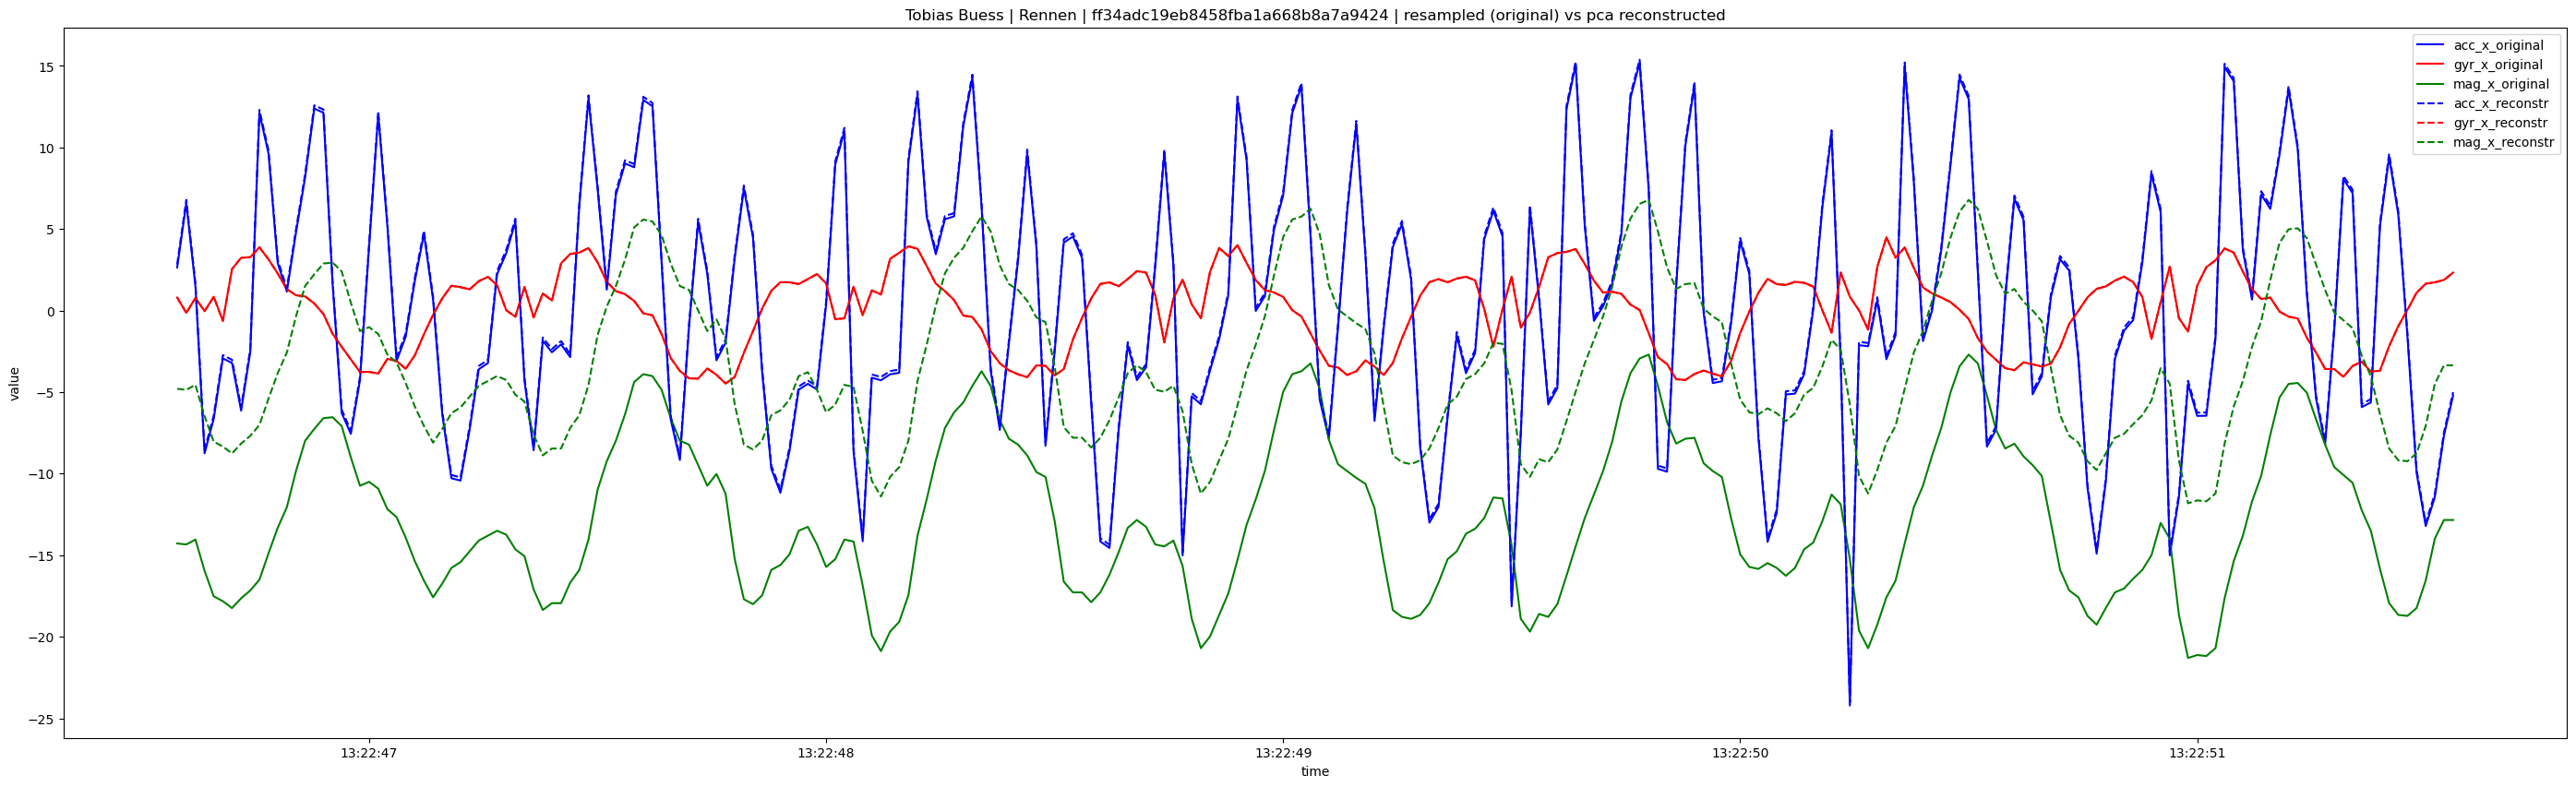

In [311]:
plt.figure(figsize=(35, 10))
plt.plot(first_segment.index.values, first_segment["Accelerometer_x"].values, label="acc_x_original", color="blue")
plt.plot(first_segment.index.values, first_segment["Gyroscope_x"].values, label="gyr_x_original", color="red")
plt.plot(first_segment.index.values, first_segment["Magnetometer_x"].values, label="mag_x_original", color="green")
plt.plot(first_segment_pca_transformed_back.index.values, first_segment_pca_transformed_back["Accelerometer_x"].values, '--', label="acc_x_reconstr", color="blue")
plt.plot(first_segment_pca_transformed_back.index.values, first_segment_pca_transformed_back["Gyroscope_x"].values, '--', label="gyr_x_reconstr", color="red")
plt.plot(first_segment_pca_transformed_back.index.values, first_segment_pca_transformed_back["Magnetometer_x"].values, '--', label="mag_x_reconstr", color="green")
plt.xlabel("time")
plt.ylabel("value")
plt.title("Tobias Buess | Rennen | ff34adc19eb8458fba1a668b8a7a9424 | resampled (original) vs pca reconstructed")
plt.legend()
plt.show()

Bei der Rücktransformation fällt auf, dass die Features bis auf den Magnetometer mit allen Komponenten wieder beinahe korrekt rekonstruiert werden können.

Dies liegt möglicherweise an der Natur der Daten.

# sklearn dataloader test

In [312]:
config = Namespace(
    **{
        "data":{
            "params":{
                "columns": "numeric"
            }
        }
    }
)

dataloader = DataLoaderSklearn.DataLoaderSklearn_Segments(config, "data/fft.dill", "data/train_test_split_ratio02.json")

In [313]:
segments_train = []
segments_test = []

for (activity, person, hash_), segments in fft.items():
    for segment in segments:
        segment:pd.DataFrame
        assert len(np.unique(segment["segment_id"])) == 1

        segment_id = segment["segment_id"].values[0]

        if segment_id in df_train_test_split["train"]:
            segments_train.append(segment.iloc[:, :9].to_numpy().flatten("F"))

        elif segment_id in df_train_test_split["test"]:
            segments_test.append(segment.iloc[:, :9].to_numpy().flatten("F"))

        else:
            raise Exception("unknown segment id")
        
train_data = np.vstack(segments_train)
test_data = np.vstack(segments_test)

In [314]:
train_data

array([[6.026584  , 0.19909038, 0.15124099, ..., 0.02534239, 0.02320953,
        0.02705617],
       [6.2920723 , 0.19133414, 0.22775254, ..., 0.01012146, 0.01297307,
        0.00982712],
       [6.160424  , 0.0528309 , 0.1849136 , ..., 0.06048413, 0.0576136 ,
        0.06148918],
       ...,
       [0.6915549 , 0.24530593, 0.13399501, ..., 0.02739596, 0.02367692,
        0.01661074],
       [0.34621072, 0.2198097 , 0.15136406, ..., 0.08263092, 0.07124633,
        0.06729092],
       [1.0326374 , 0.4973166 , 0.25714514, ..., 0.08038684, 0.07342807,
        0.08227249]], dtype=float32)

In [315]:
print("Train data matrix correct: ", np.equal(np.sort(dataloader.train_data), np.sort(train_data)).all())
print("Test data matrix correct: ", np.equal(np.sort(dataloader.test_data), np.sort(test_data)).all())

Train data matrix correct:  True
Test data matrix correct:  True


Hier wurde nochmals versucht die Daten in eine Train und Test Matrix aufzuspalten.

Anschliessen wurde der Output mit dem Output des Dataloaders verglichen.

Beide Splits erhielten den selben Outcome.

Somit hat der Dataloader korrekt funktioniert.

# NDArray Dataloader

In [318]:
config = Namespace(
    **{
        "seed": 40,
        "data":{
            "output_size": 6,
            "num_workers": 0,
            "train_val_split": 0.8,
            "batch_size": 64
        }
    }
)

dataloader = DataLoaderNDArray.DataModuleNDArray(config, "data/stft.dill", "data/train_test_split_ratio02.json")
dataloader.setup("fit")

train_dataloader = dataloader.train_dataloader()
valid_dataloader = dataloader.val_dataloader()

dataloader.setup("test")

test_dataloader = dataloader.test_dataloader()

In [323]:
with open("data/stft.dill", "rb") as fr:
    stft = load(fr)

In [354]:
full_data_from_file = []
for key, segments in stft.items():
    for segm_id, segment in segments:
        full_data_from_file.append(torch.tensor(segment))

full_data_from_file = torch.stack(full_data_from_file)

In [341]:
train_data =  torch.cat([input_ for input_, _, in train_dataloader], dim=0)
val_data =  torch.cat([input_ for input_, _, in valid_dataloader], dim=0)
test_data =  torch.cat([input_ for input_, _, in test_dataloader], dim=0)

In [347]:
full_data_from_loader = torch.cat([train_data, val_data, test_data])

In [358]:
print("Train, val, test data from specific loaders (concated) and 'data/stft.dill' are equal:")
torch.equal(full_data_from_file.sort(dim=0)[0], full_data_from_loader.sort(dim=0)[0])

Train, val, test data from specific loaders (concated) and 'data/stft.dill' are equal:


True

Hier wurden die Daten vom train_dataloader, valid_dataloader und test_dataloader geholt und überprüft, ob all diese daten im **data/stft.dill** existieren.

Dies ist der fall, weshalb davon ausgegangen werden kann, dass dieser Dataloader funktioniert.